In [49]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [50]:

# Reading the CSV file into a DataFrame
df = pd.read_csv("Pima_Indians_Diabetes_Database.csv")

# Displaying the first few rows of the DataFrame
df.head()


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [52]:
# Replace zeros with NaN in specified columns
columns_with_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df[columns_with_zeros] = df[columns_with_zeros].replace(0, np.nan)

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   763 non-null    float64
 2   BloodPressure             733 non-null    float64
 3   SkinThickness             541 non-null    float64
 4   Insulin                   394 non-null    float64
 5   BMI                       757 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


In [54]:
# Count of missing values
missing_values_count = df[columns_with_zeros].isnull().sum()
print(missing_values_count)

Glucose            5
BloodPressure     35
SkinThickness    227
Insulin          374
BMI               11
dtype: int64


In [42]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [47]:
from sklearn.model_selection import GridSearchCV

# Parameters grid to search
param_grid = {
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300],
    'subsample': [0.7, 0.8, 0.9]
}

# Initialize the XGBClassifier
xgb_clf = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Setup the grid search
grid_search = GridSearchCV(estimator=xgb_clf, param_grid=param_grid, cv=3, scoring='accuracy', verbose=1)

# Fit grid search
best_model = grid_search.fit(X_train, y_train)

print("Best parameters found: ", best_model.best_params_)
print("Best accuracy found: ", best_model.best_score_)


Fitting 3 folds for each of 81 candidates, totalling 243 fits
Best parameters found:  {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 300, 'subsample': 0.8}
Best accuracy found:  0.7817312290769967


In [55]:
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

# Parameters grid to search
param_grid = {
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300],
    'subsample': [0.7, 0.8, 0.9]
}

# Initialize the XGBClassifier
xgb_clf = XGBClassifier(eval_metric='logloss')

# Setup the grid search
grid_search = GridSearchCV(estimator=xgb_clf, param_grid=param_grid, cv=3, scoring='accuracy', verbose=1)

# Fit grid search
best_model = grid_search.fit(X_train, y_train)

# Print best parameters and cross-validation accuracy
print("Best parameters found: ", best_model.best_params_)
print("Best cross-validation accuracy found: ", best_model.best_score_)

# Make predictions on the test set
y_pred = best_model.predict(X_test)
y_pred_proba = best_model.predict_proba(X_test)[:, 1]  # Get probability estimates for ROC-AUC

# Calculate accuracy, precision, recall, F1-score, and ROC-AUC score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Print results
print(f"Test Accuracy: {accuracy:.4f}")
print(f"Test Precision: {precision:.4f}")
print(f"Test Recall: {recall:.4f}")
print(f"Test F1-Score: {f1:.4f}")
print(f"Test ROC-AUC Score: {roc_auc:.4f}")



Fitting 3 folds for each of 81 candidates, totalling 243 fits
Best parameters found:  {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 300, 'subsample': 0.8}
Best cross-validation accuracy found:  0.7817312290769967
Test Accuracy: 0.7468
Test Precision: 0.6290
Test Recall: 0.7091
Test F1-Score: 0.6667
Test ROC-AUC Score: 0.8224


In [57]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, precision_score, recall_score, f1_score

# Define the RandomForestClassifier
rf_clf = RandomForestClassifier()

# Create a pipeline to impute missing values and fit the RandomForestClassifier
pipeline_rf = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Impute missing values with the mean
    ('classifier', rf_clf)
])

# Parameters grid to search for Random Forest
param_grid_rf = {
    'classifier__n_estimators': [100, 200, 300],   # Number of trees in the forest
    'classifier__max_depth': [3, 5, 7],            # Maximum depth of the tree
    'classifier__min_samples_split': [2, 5, 10],   # Minimum samples required to split an internal node
    'classifier__min_samples_leaf': [1, 2, 4],     # Minimum number of samples required to be at a leaf node
    'classifier__bootstrap': [True, False]         # Whether to use bootstrap samples
}

# Setup the grid search for Random Forest
grid_search_rf = GridSearchCV(estimator=pipeline_rf, param_grid=param_grid_rf, cv=3, scoring='accuracy', verbose=1)

# Fit grid search for Random Forest
best_model_rf = grid_search_rf.fit(X_train, y_train)

# Print best parameters and cross-validation accuracy for Random Forest
print("Best Random Forest parameters found: ", best_model_rf.best_params_)
print("Best Random Forest cross-validation accuracy found: ", best_model_rf.best_score_)

# Make predictions using the best Random Forest model
y_pred_rf = best_model_rf.predict(X_test)
y_pred_proba_rf = best_model_rf.predict_proba(X_test)[:, 1]  # Probability estimates for ROC-AUC

# Calculate evaluation metrics for Random Forest
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
roc_auc_rf = roc_auc_score(y_test, y_pred_proba_rf)

# Print Random Forest evaluation metrics
print(f"Random Forest Test Accuracy: {accuracy_rf:.4f}")
print(f"Random Forest Test Precision: {precision_rf:.4f}")
print(f"Random Forest Test Recall: {recall_rf:.4f}")
print(f"Random Forest Test F1-Score: {f1_rf:.4f}")
print(f"Random Forest Test ROC-AUC Score: {roc_auc_rf:.4f}")

Fitting 3 folds for each of 162 candidates, totalling 486 fits
Best Random Forest parameters found:  {'classifier__bootstrap': False, 'classifier__max_depth': 5, 'classifier__min_samples_leaf': 4, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 200}
Best Random Forest cross-validation accuracy found:  0.7784552845528455
Random Forest Test Accuracy: 0.7597
Random Forest Test Precision: 0.6667
Random Forest Test Recall: 0.6545
Random Forest Test F1-Score: 0.6606
Random Forest Test ROC-AUC Score: 0.8380


In [59]:
# Drop rows with missing values in the training and test data
X_train_clean = X_train.dropna()
y_train_clean = y_train[X_train_clean.index]
X_test_clean = X_test.dropna()
y_test_clean = y_test[X_test_clean.index]

# Define the DecisionTreeClassifier
dt_clf = DecisionTreeClassifier()

# Parameters grid to search for Decision Tree
param_grid_dt = {
    'max_depth': [3, 5, 7, 10],               # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],          # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],            # Minimum number of samples required to be at a leaf node
    'criterion': ['gini', 'entropy']          # Function to measure the quality of a split
}

# Setup the grid search for Decision Tree
grid_search_dt = GridSearchCV(estimator=dt_clf, param_grid=param_grid_dt, cv=3, scoring='accuracy', verbose=1)

# Fit grid search for Decision Tree
best_model_dt = grid_search_dt.fit(X_train_clean, y_train_clean)

# Print best parameters and cross-validation accuracy for Decision Tree
print("Best Decision Tree parameters found: ", best_model_dt.best_params_)
print("Best Decision Tree cross-validation accuracy found: ", best_model_dt.best_score_)

# Make predictions using the best Decision Tree model
y_pred_dt = best_model_dt.predict(X_test_clean)
y_pred_proba_dt = best_model_dt.predict_proba(X_test_clean)[:, 1]  # Probability estimates for ROC-AUC

# Calculate evaluation metrics for Decision Tree
accuracy_dt = accuracy_score(y_test_clean, y_pred_dt)
precision_dt = precision_score(y_test_clean, y_pred_dt)
recall_dt = recall_score(y_test_clean, y_pred_dt)
f1_dt = f1_score(y_test_clean, y_pred_dt)
roc_auc_dt = roc_auc_score(y_test_clean, y_pred_proba_dt)

# Print Decision Tree evaluation metrics
print(f"Decision Tree Test Accuracy: {accuracy_dt:.4f}")
print(f"Decision Tree Test Precision: {precision_dt:.4f}")
print(f"Decision Tree Test Recall: {recall_dt:.4f}")
print(f"Decision Tree Test F1-Score: {f1_dt:.4f}")
print(f"Decision Tree Test ROC-AUC Score: {roc_auc_dt:.4f}")




Fitting 3 folds for each of 72 candidates, totalling 216 fits
Best Decision Tree parameters found:  {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Decision Tree cross-validation accuracy found:  0.7826237452405677
Decision Tree Test Accuracy: 0.7714
Decision Tree Test Precision: 0.6667
Decision Tree Test Recall: 0.8148
Decision Tree Test F1-Score: 0.7333
Decision Tree Test ROC-AUC Score: 0.8015


Fitting 3 folds for each of 4 candidates, totalling 12 fits
Fitting 3 folds for each of 4 candidates, totalling 12 fits
Fitting 3 folds for each of 8 candidates, totalling 24 fits


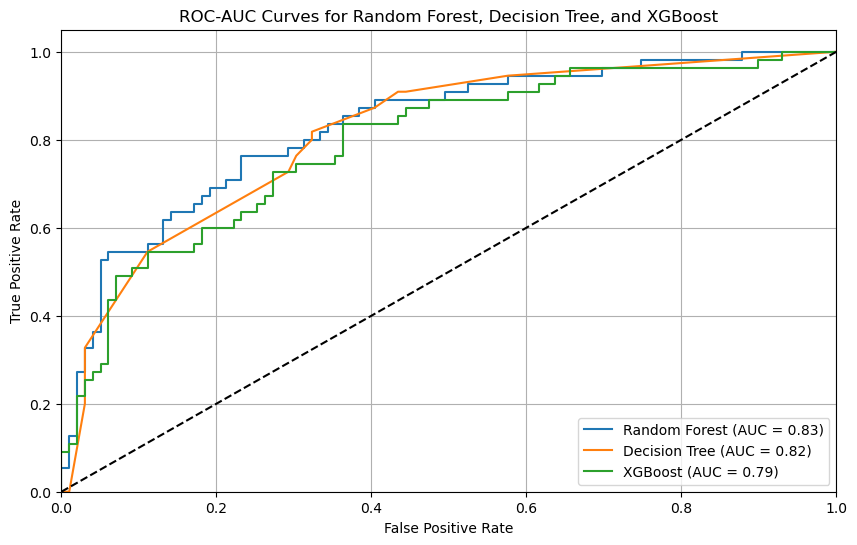

In [62]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

# Assuming you have X_train, y_train, X_test, and y_test already

# Define a function to plot the ROC-AUC curve for each model
def plot_roc_curve(y_test, y_pred_proba, label):
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    plt.plot(fpr, tpr, label=f'{label} (AUC = {roc_auc:.2f})')

# Pipeline and grid search setup for RandomForestClassifier
rf_clf = RandomForestClassifier()
pipeline_rf = Pipeline(steps=[('imputer', SimpleImputer(strategy='mean')), ('classifier', rf_clf)])
param_grid_rf = {'classifier__n_estimators': [100, 200], 'classifier__max_depth': [5, 10]}
grid_search_rf = GridSearchCV(estimator=pipeline_rf, param_grid=param_grid_rf, cv=3, scoring='accuracy', verbose=1)
best_model_rf = grid_search_rf.fit(X_train, y_train)

# Pipeline and grid search setup for DecisionTreeClassifier
dt_clf = DecisionTreeClassifier()
pipeline_dt = Pipeline(steps=[('imputer', SimpleImputer(strategy='mean')), ('classifier', dt_clf)])
param_grid_dt = {'classifier__max_depth': [5, 10], 'classifier__criterion': ['gini', 'entropy']}
grid_search_dt = GridSearchCV(estimator=pipeline_dt, param_grid=param_grid_dt, cv=3, scoring='accuracy', verbose=1)
best_model_dt = grid_search_dt.fit(X_train, y_train)

# Grid search setup for XGBoost Classifier
xgb_clf = XGBClassifier(eval_metric='logloss', use_label_encoder=False)
param_grid_xgb = {'max_depth': [5, 10], 'n_estimators': [100, 200], 'learning_rate': [0.01, 0.1]}
grid_search_xgb = GridSearchCV(estimator=xgb_clf, param_grid=param_grid_xgb, cv=3, scoring='accuracy', verbose=1)
best_model_xgb = grid_search_xgb.fit(X_train, y_train)

# Make probability predictions for ROC-AUC curve
y_pred_proba_rf = best_model_rf.predict_proba(X_test)[:, 1]  # Random Forest
y_pred_proba_dt = best_model_dt.predict_proba(X_test)[:, 1]  # Decision Tree
y_pred_proba_xgb = best_model_xgb.predict_proba(X_test)[:, 1]  # XGBoost

# Plot ROC curves for all models
plt.figure(figsize=(10, 6))
plot_roc_curve(y_test, y_pred_proba_rf, label='Random Forest')
plot_roc_curve(y_test, y_pred_proba_dt, label='Decision Tree')
plot_roc_curve(y_test, y_pred_proba_xgb, label='XGBoost')

# Plot settings
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC Curves for Random Forest, Decision Tree, and XGBoost')
plt.legend(loc='lower right')
plt.grid()
plt.show()


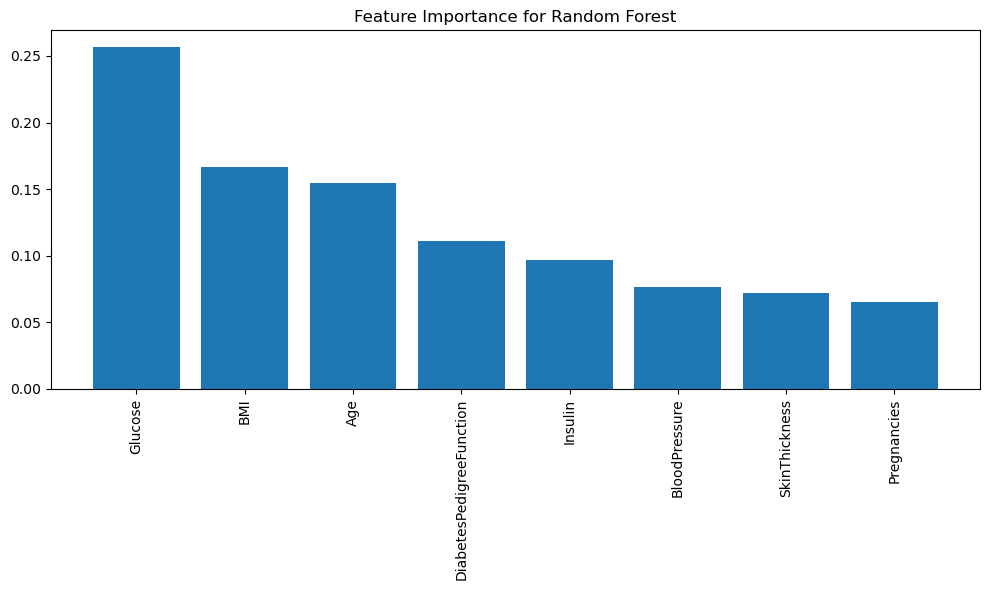

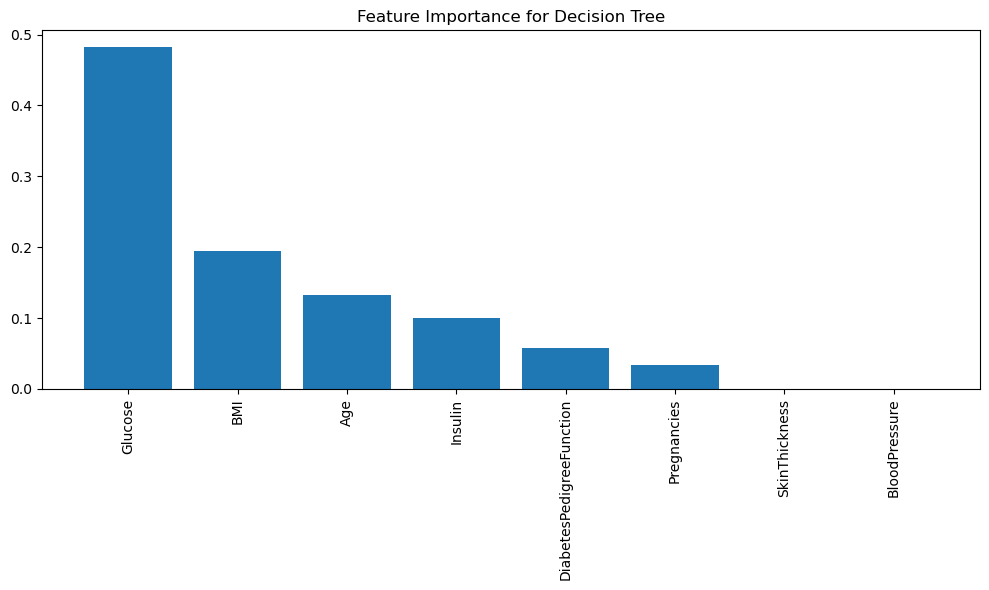

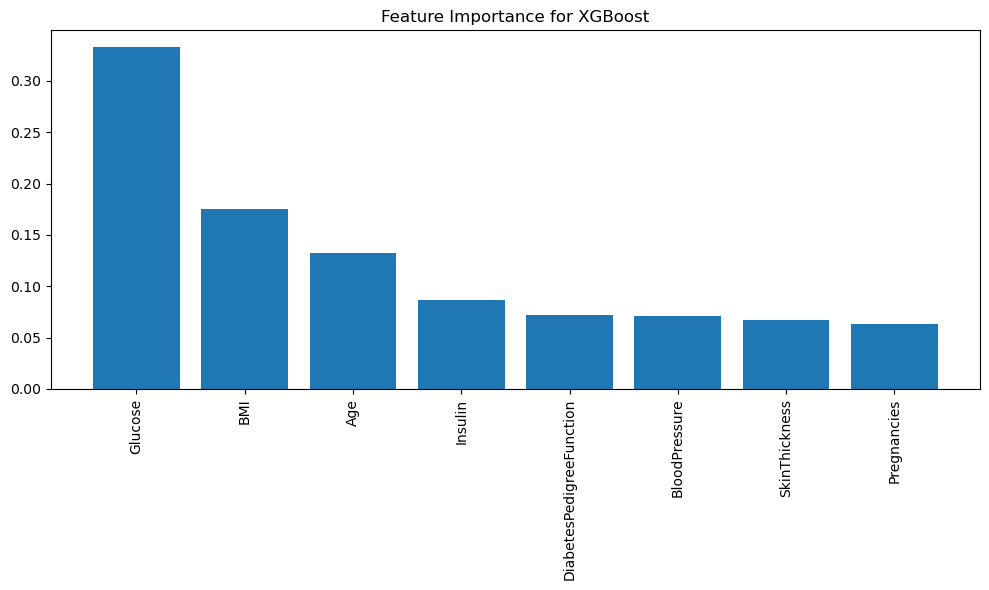

In [63]:
import matplotlib.pyplot as plt
import numpy as np

# Define a function to plot feature importances
def plot_feature_importance(importances, feature_names, model_name):
    indices = np.argsort(importances)[::-1]  # Sort feature importances in descending order
    plt.figure(figsize=(10, 6))
    plt.title(f'Feature Importance for {model_name}')
    plt.bar(range(len(importances)), importances[indices], align='center')
    plt.xticks(range(len(importances)), np.array(feature_names)[indices], rotation=90)
    plt.tight_layout()
    plt.show()

# Assuming you have the feature names in a list called 'feature_names'
feature_names = X_train.columns  # Adjust based on how your features are named

### Random Forest Feature Importance
importances_rf = best_model_rf.best_estimator_.named_steps['classifier'].feature_importances_
plot_feature_importance(importances_rf, feature_names, "Random Forest")

### Decision Tree Feature Importance
importances_dt = best_model_dt.best_estimator_.named_steps['classifier'].feature_importances_
plot_feature_importance(importances_dt, feature_names, "Decision Tree")

### XGBoost Feature Importance
importances_xgb = best_model_xgb.best_estimator_.feature_importances_
plot_feature_importance(importances_xgb, feature_names, "XGBoost")


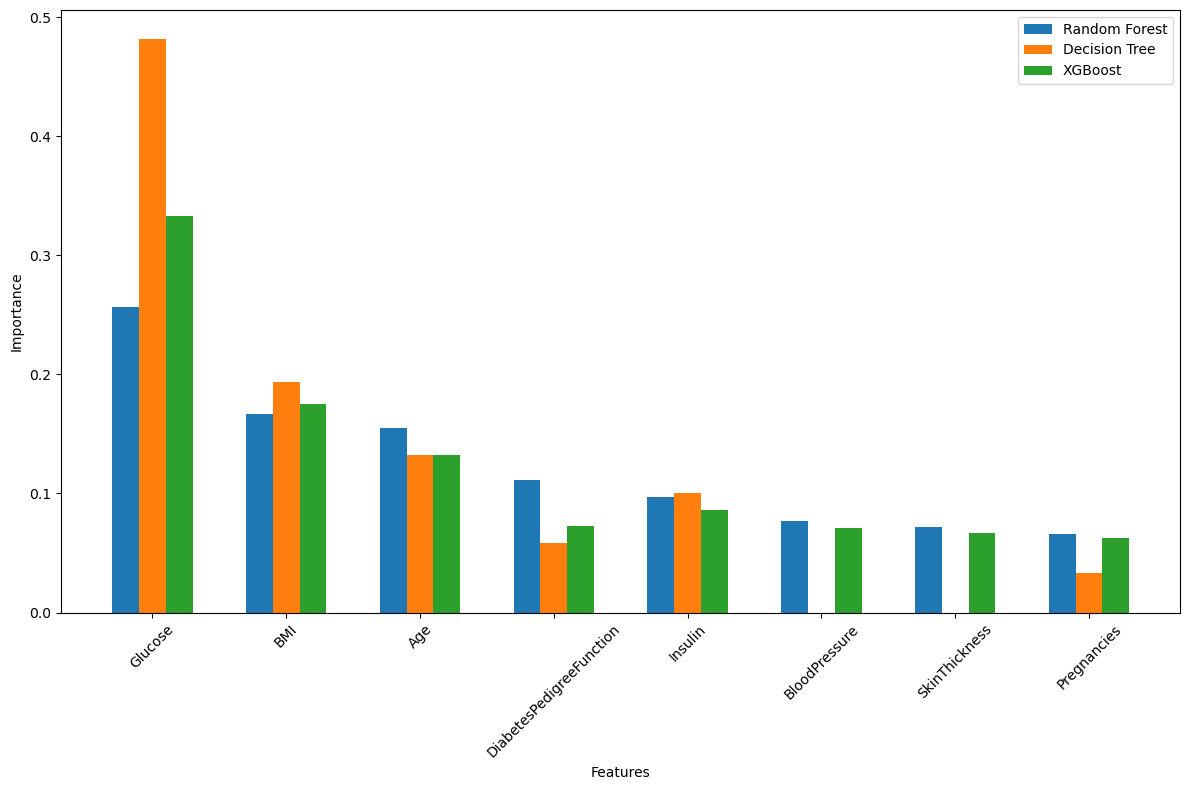

In [80]:
import matplotlib.pyplot as plt
import numpy as np

# Define a function to plot and save feature importances for all models on the same plot
def plot_combined_feature_importance(importances_dict, feature_names, save_path='combined_feature_importance.png'):
    indices = np.argsort(importances_dict['Random Forest'])[::-1]  # Sort based on Random Forest importance

    plt.figure(figsize=(12, 8))
    bar_width = 0.2  # Set the bar width for the combined plot
    index = np.arange(len(feature_names))

    # Plot for each model
    plt.bar(index, importances_dict['Random Forest'][indices], bar_width, label='Random Forest')
    plt.bar(index + bar_width, importances_dict['Decision Tree'][indices], bar_width, label='Decision Tree')
    plt.bar(index + 2 * bar_width, importances_dict['XGBoost'][indices], bar_width, label='XGBoost')

    # Plot settings
    plt.xticks(index + bar_width, np.array(feature_names)[indices], rotation=45)
    plt.xlabel('Features')
    plt.ylabel('Importance')
    plt.legend()
    plt.tight_layout()

    # Save the plot as an image file with high quality
    plt.savefig(save_path, format='png', dpi=300)  # Save as PNG with 300 DPI
    plt.show()

# Assuming you have the feature names in a list called 'feature_names'
feature_names = X_train.columns  # Adjust based on how your features are named

# Extract feature importances from all models
importances_rf = best_model_rf.best_estimator_.named_steps['classifier'].feature_importances_
importances_dt = best_model_dt.best_estimator_.named_steps['classifier'].feature_importances_
importances_xgb = best_model_xgb.best_estimator_.feature_importances_

# Combine the feature importances into a dictionary for easy access
importances_dict = {
    'Random Forest': importances_rf,
    'Decision Tree': importances_dt,
    'XGBoost': importances_xgb
}

# Plot and save combined feature importances
plot_combined_feature_importance(importances_dict, feature_names, save_path='combined_feature_importance_high_quality.png')


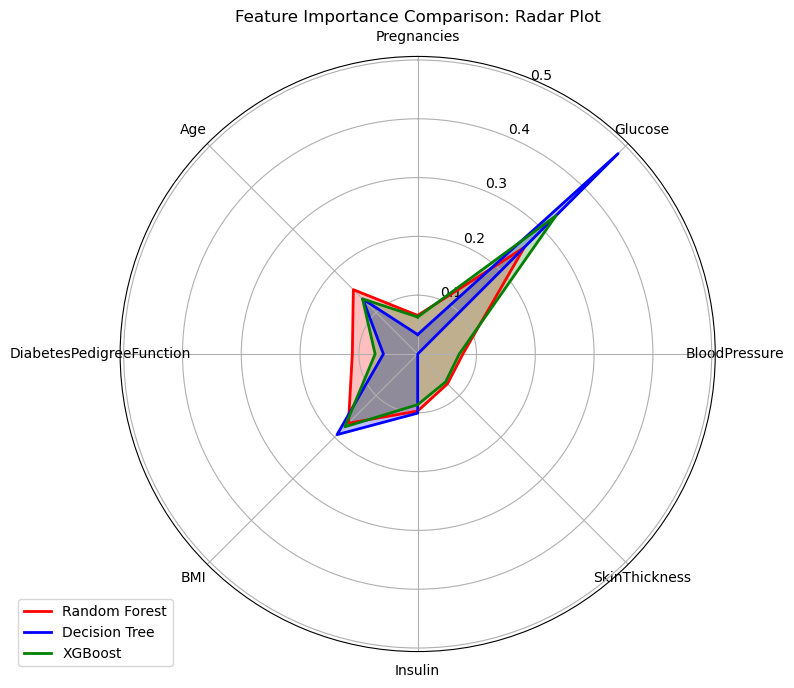

In [69]:
import matplotlib.pyplot as plt
import numpy as np

# Define a function to plot feature importances using a radar plot
def plot_radar_feature_importance(importances_dict, feature_names):
    labels = np.array(feature_names)
    num_features = len(labels)
    
    # Prepare angles for radar chart
    angles = np.linspace(0, 2 * np.pi, num_features, endpoint=False).tolist()
    angles += angles[:1]  # Complete the loop
    
    fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
    
    # Plot for Random Forest
    values_rf = np.concatenate((importances_dict['Random Forest'], [importances_dict['Random Forest'][0]]))
    ax.plot(angles, values_rf, color='r', linewidth=2, label='Random Forest')
    ax.fill(angles, values_rf, color='r', alpha=0.25)

    # Plot for Decision Tree
    values_dt = np.concatenate((importances_dict['Decision Tree'], [importances_dict['Decision Tree'][0]]))
    ax.plot(angles, values_dt, color='b', linewidth=2, label='Decision Tree')
    ax.fill(angles, values_dt, color='b', alpha=0.25)

    # Plot for XGBoost
    values_xgb = np.concatenate((importances_dict['XGBoost'], [importances_dict['XGBoost'][0]]))
    ax.plot(angles, values_xgb, color='g', linewidth=2, label='XGBoost')
    ax.fill(angles, values_xgb, color='g', alpha=0.25)

    # Set labels and title
    ax.set_theta_offset(np.pi / 2)
    ax.set_theta_direction(-1)
    ax.set_thetagrids(np.degrees(angles[:-1]), labels)
    plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
    plt.tight_layout()
    plt.show()

# Plot radar plot for feature importance
plot_radar_feature_importance(importances_dict, feature_names)


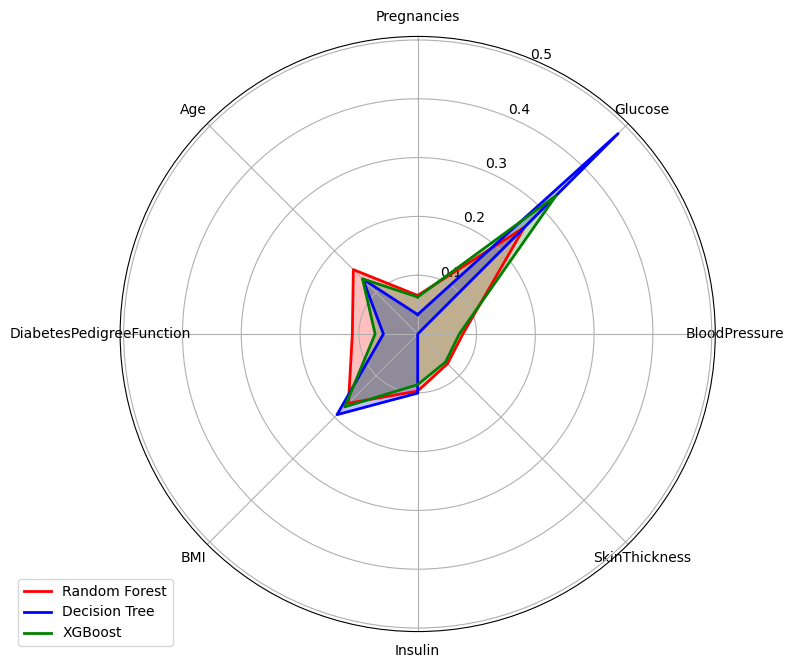

In [71]:
import matplotlib.pyplot as plt
import numpy as np

# Define a function to plot and save feature importances using a radar plot
def plot_radar_feature_importance(importances_dict, feature_names, save_path='radar_plot.png'):
    labels = np.array(feature_names)
    num_features = len(labels)
    
    # Prepare angles for radar chart
    angles = np.linspace(0, 2 * np.pi, num_features, endpoint=False).tolist()
    angles += angles[:1]  # Complete the loop
    
    fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
    
    # Plot for Random Forest
    values_rf = np.concatenate((importances_dict['Random Forest'], [importances_dict['Random Forest'][0]]))
    ax.plot(angles, values_rf, color='r', linewidth=2, label='Random Forest')
    ax.fill(angles, values_rf, color='r', alpha=0.25)

    # Plot for Decision Tree
    values_dt = np.concatenate((importances_dict['Decision Tree'], [importances_dict['Decision Tree'][0]]))
    ax.plot(angles, values_dt, color='b', linewidth=2, label='Decision Tree')
    ax.fill(angles, values_dt, color='b', alpha=0.25)

    # Plot for XGBoost
    values_xgb = np.concatenate((importances_dict['XGBoost'], [importances_dict['XGBoost'][0]]))
    ax.plot(angles, values_xgb, color='g', linewidth=2, label='XGBoost')
    ax.fill(angles, values_xgb, color='g', alpha=0.25)

    # Set labels and title
    ax.set_theta_offset(np.pi / 2)
    ax.set_theta_direction(-1)
    ax.set_thetagrids(np.degrees(angles[:-1]), labels)
    plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

    # Save the plot as an image file with high quality
    plt.tight_layout()
    plt.savefig(save_path, format='png', dpi=300)  # Save as PNG with 300 DPI
    plt.show()

# Example usage to save the plot as 'radar_plot_high_quality.png'
plot_radar_feature_importance(importances_dict, feature_names, save_path='radar_plot_high_quality.png')


In [92]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, Flatten, Dropout
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Step 1: Load and Preprocess the Dataset

# Reading the CSV file into a DataFrame
df = pd.read_csv("Pima_Indians_Diabetes_Database.csv")

# Features and target
X = df.drop(columns=['Outcome'])
y = df['Outcome']

# Step 1.1: Handle missing values by replacing 0s with the median in relevant columns
columns_with_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
imputer = SimpleImputer(missing_values=0, strategy='median')
X[columns_with_zeros] = imputer.fit_transform(X[columns_with_zeros])

# Step 1.2: Check if the imputation was successful
print(f"Zeros handled in columns:\n{(X[columns_with_zeros] == 0).sum()}")

# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshape the data for CNN (samples, time steps, features)
X_train_cnn = X_train_scaled.reshape(X_train_scaled.shape[0], X_train_scaled.shape[1], 1)
X_test_cnn = X_test_scaled.reshape(X_test_scaled.shape[0], X_test_scaled.shape[1], 1)

# Step 4: Build and Train the CNN Model

# Build a simple CNN model
cnn_model = Sequential()

# Add a Conv1D layer
cnn_model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(X_train_cnn.shape[1], 1)))
cnn_model.add(Dropout(0.2))

# Flatten the output
cnn_model.add(Flatten())

# Fully connected layers
cnn_model.add(Dense(64, activation='relu'))
cnn_model.add(Dense(32, activation='relu'))

# Output layer for binary classification
cnn_model.add(Dense(1, activation='sigmoid'))

# Compile the model
cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
cnn_model.fit(X_train_cnn, y_train, epochs=20, batch_size=32, validation_split=0.2)

# Step 5: Evaluate the Model

# Make predictions
y_pred_cnn = (cnn_model.predict(X_test_cnn) > 0.5).astype("int32")
y_pred_proba_cnn = cnn_model.predict(X_test_cnn)  # For ROC-AUC

# Calculate evaluation metrics
accuracy_cnn = accuracy_score(y_test, y_pred_cnn)
precision_cnn = precision_score(y_test, y_pred_cnn)
recall_cnn = recall_score(y_test, y_pred_cnn)
f1_cnn = f1_score(y_test, y_pred_cnn)
roc_auc_cnn = roc_auc_score(y_test, y_pred_proba_cnn)

# Print results
print(f"CNN Test Accuracy: {accuracy_cnn:.4f}")
print(f"CNN Test Precision: {precision_cnn:.4f}")
print(f"CNN Test Recall: {recall_cnn:.4f}")
print(f"CNN Test F1-Score: {f1_cnn:.4f}")
print(f"CNN Test ROC-AUC Score: {roc_auc_cnn:.4f}")


Zeros handled in columns:
Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
dtype: int64
Epoch 1/20


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6887 - loss: 0.6455 - val_accuracy: 0.6992 - val_loss: 0.5583
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7338 - loss: 0.5100 - val_accuracy: 0.7724 - val_loss: 0.4679
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7691 - loss: 0.4681 - val_accuracy: 0.7724 - val_loss: 0.4492
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7654 - loss: 0.4628 - val_accuracy: 0.7561 - val_loss: 0.4442
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7903 - loss: 0.4320 - val_accuracy: 0.7642 - val_loss: 0.4461
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8054 - loss: 0.4229 - val_accuracy: 0.7561 - val_loss: 0.4415
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8010 - loss: 0.4170 - val_accuracy: 0.7642 - val_loss: 0.4371
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7987 - loss: 0.4098 - val_accuracy: 0.7561 - val_loss: 0.4427
Epo

In [123]:
import lime
import lime.lime_tabular
import numpy as np

# Step 6: Flatten the data for LIME (since LIME works on tabular data, we need 2D input)
X_train_flattened = X_train_scaled
X_test_flattened = X_test_scaled

# Step 7: Create a LIME explainer for tabular data
explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=X_train_flattened,
    feature_names=X_train.columns,
    class_names=['Non-Diabetic', 'Diabetic'],  # Labels for binary classification
    mode='classification'
)

# Step 8: Use LIME to explain the first prediction (or any instance you want)
i = 15  # The index of the test instance to explain
instance = X_test_flattened[i]

# Step 9: Define a predict function for LIME
# LIME requires a predict function that returns probabilities for each class
def cnn_predict_fn(data):
    # Reshape input back to 3D for CNN
    data_reshaped = data.reshape(data.shape[0], data.shape[1], 1)
    # Return probabilities for both classes
    return np.hstack((1 - cnn_model.predict(data_reshaped), cnn_model.predict(data_reshaped)))

# Step 10: Generate the explanation using LIME
exp = explainer.explain_instance(
    data_row=instance,
    predict_fn=cnn_predict_fn,  # Use the defined predict function
    num_features=5  # Number of top features to show
)

# Step 11: Display the explanation in a notebook or save as an HTML file
exp.show_in_notebook(show_table=True)
exp.save_to_file('lime_cnn_explanation.html')


157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 456us/step


In [95]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Step 1: Preprocess the data for LSTM

# Assuming X_train_scaled and X_test_scaled are already scaled
# Reshape the data for LSTM (samples, timesteps, features)
# Timesteps is set to 1 for tabular data since it's not inherently sequential
X_train_lstm = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_lstm = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

# Step 2: Build the LSTM model

lstm_model = Sequential()

# Add an LSTM layer
lstm_model.add(LSTM(100, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2]), activation='relu', return_sequences=False))

# Add Dropout to reduce overfitting
lstm_model.add(Dropout(0.2))

# Fully connected layer
lstm_model.add(Dense(64, activation='relu'))

# Output layer for binary classification
lstm_model.add(Dense(1, activation='sigmoid'))

# Compile the model
lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Step 3: Train the LSTM model
lstm_model.fit(X_train_lstm, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Step 4: Evaluate the LSTM model
y_pred_lstm = (lstm_model.predict(X_test_lstm) > 0.5).astype("int32")
y_pred_proba_lstm = lstm_model.predict(X_test_lstm)  # For ROC-AUC calculation

# Calculate evaluation metrics
accuracy_lstm = accuracy_score(y_test, y_pred_lstm)
precision_lstm = precision_score(y_test, y_pred_lstm)
recall_lstm = recall_score(y_test, y_pred_lstm)
f1_lstm = f1_score(y_test, y_pred_lstm)
roc_auc_lstm = roc_auc_score(y_test, y_pred_proba_lstm)

# Print results
print(f"LSTM Test Accuracy: {accuracy_lstm:.4f}")
print(f"LSTM Test Precision: {precision_lstm:.4f}")
print(f"LSTM Test Recall: {recall_lstm:.4f}")
print(f"LSTM Test F1-Score: {f1_lstm:.4f}")
print(f"LSTM Test ROC-AUC Score: {roc_auc_lstm:.4f}")


Epoch 1/50


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6614 - loss: 0.6706 - val_accuracy: 0.6098 - val_loss: 0.6389
Epoch 2/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6409 - loss: 0.6211 - val_accuracy: 0.6423 - val_loss: 0.5832
Epoch 3/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6984 - loss: 0.5475 - val_accuracy: 0.6504 - val_loss: 0.5358
Epoch 4/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7443 - loss: 0.4980 - val_accuracy: 0.7317 - val_loss: 0.5032
Epoch 5/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7739 - loss: 0.4572 - val_accuracy: 0.7724 - val_loss: 0.4794
Epoch 6/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7878 - loss: 0.4437 - val_accuracy: 0.7805 - val_loss: 0.4578
Epoch 7/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7566 - loss: 0.4753 - val_accuracy: 0.7724 - val_loss: 0.4531
Epoch 8/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7784 - loss: 0.4302 - val_accuracy: 0.7724 - val_loss: 0.4492
Epo

In [131]:
import lime
import lime.lime_tabular
import numpy as np



# Step 1: Create a LIME explainer for tabular data
explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=X_train_flattened,
    feature_names=X_train.columns,
    class_names=['Non-Diabetic', 'Diabetic'],  # Assuming a binary classification task
    mode='classification'
)

# Step 2: Define the predict function for LIME (return probabilities for both classes)
def lstm_predict_fn(data):
    # Reshape the input back to the 3D format (samples, timesteps, features) for LSTM
    data_reshaped = data.reshape(data.shape[0], 1, data.shape[1])
    # Predict probabilities using the LSTM model
    return np.hstack((1 - lstm_model.predict(data_reshaped), lstm_model.predict(data_reshaped)))

# Step 3: Use LIME to explain a single instance
i = 5  # The index of the test instance to explain
instance = X_test_flattened[i]

# Generate the explanation using LIME
exp = explainer.explain_instance(
    data_row=instance,
    predict_fn=lstm_predict_fn,  # Use the custom predict function
    num_features=5  # Show the top 5 most important features
)

# Step 4: Display the explanation in a notebook or save as an HTML file
print(" ")
print(" ")
exp.show_in_notebook(show_table=True)
exp.save_to_file('lime_lstm_explanation.html')


157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 888us/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 367us/step
 
 


In [99]:
import torch
from pytorch_tabular import TabularModel
from pytorch_tabular.models import TabTransformerConfig
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Load your dataset
# df = pd.read_csv('path/to/Pima_Indians_Diabetes_Database.csv')

# Separate features and target
X = df.drop(columns=['Outcome'])
y = df['Outcome']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Prepare the data for TabTransformer
train_data = pd.DataFrame(X_train_scaled, columns=X_train.columns)
train_data['Outcome'] = y_train.values

test_data = pd.DataFrame(X_test_scaled, columns=X_test.columns)
test_data['Outcome'] = y_test.values

# TabTransformer configuration
config = TabTransformerConfig(
    task="classification",  # Since this is a classification task
    learning_rate=1e-4,
    epochs=50,
    batch_size=32,
    target=["Outcome"],  # Define the target column
    metrics=["accuracy", "precision", "recall", "f1"],
)

# Initialize TabularModel
model = TabularModel(config=config)

# Train the model
model.fit(train=train_data)

# Evaluate the model
results = model.evaluate(test=test_data)

# Print the results
print(results)


ModuleNotFoundError: No module named 'torch'

In [2]:
# Display basic information about the dataset
print("\nDataset info:")
print(df.info())


Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


In [4]:
# Statistical summary
print("\nStatistical summary:")
print(df.describe())


Statistical summary:
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.00

In [5]:
# Check for missing values
print("\nMissing values in each column:")
print(df.isnull().sum())


Missing values in each column:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


## Exploratory Data Analysis (EDA)

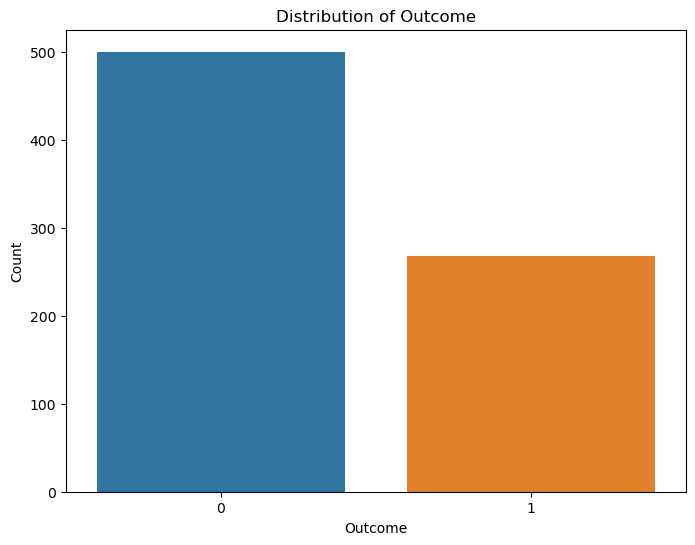

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
# Distribution of the Outcome variable
plt.figure(figsize=(8, 6))
sns.countplot(x='Outcome', data=df)
plt.title('Distribution of Outcome')
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.savefig('bar_cart_outcomes.png')
plt.show()

### Interpretation of the Distribution of Outcome

The bar chart shows the distribution of the target variable, `Outcome`, in the Pima Indians Diabetes Database. The `Outcome` variable represents whether a patient has diabetes (1) or not (0).

**Observations:**
- The bar on the left (in blue) represents the count of non-diabetic patients (Outcome = 0).
- The bar on the right (in orange) represents the count of diabetic patients (Outcome = 1).
- There are significantly more non-diabetic patients than diabetic patients in the dataset.

**Implications:**
- The dataset is imbalanced, with a higher number of non-diabetic cases compared to diabetic cases.
- When building predictive models, this imbalance should be addressed to avoid biased predictions. Techniques such as oversampling the minority class, undersampling the majority class, or using balanced accuracy metrics could be considered.

This distribution highlights the need for careful handling of class imbalance during model training to ensure that the predictive performance for both classes is adequate.

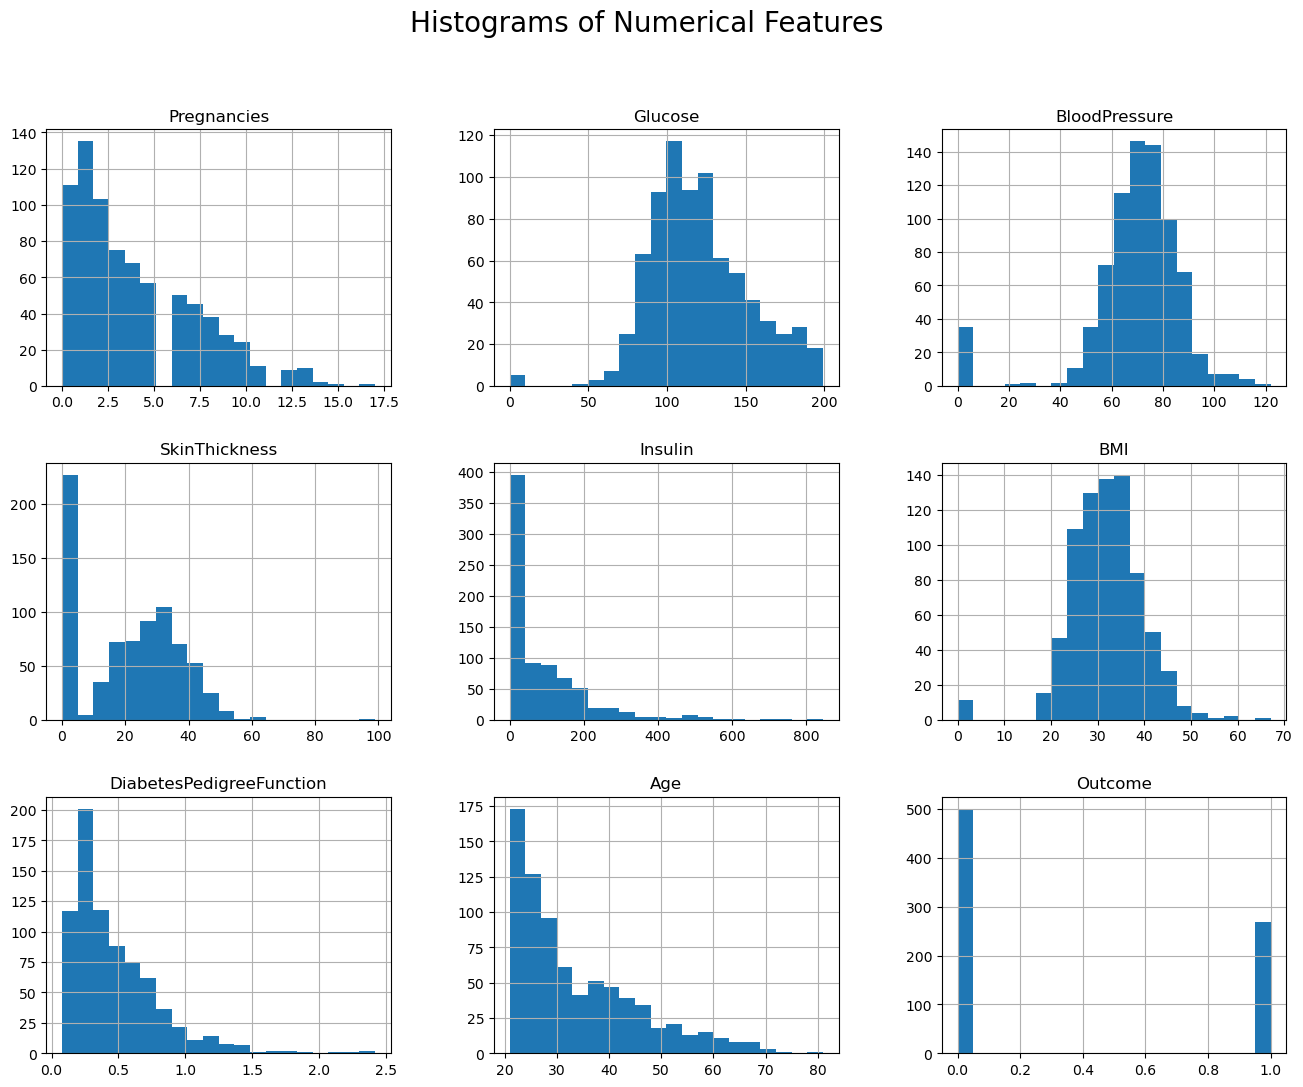

In [7]:
# Distribution of numerical features
df.hist(figsize=(16, 12), bins=20)
plt.suptitle('Histograms of Numerical Features', size=20)
plt.savefig('histogram.png')
plt.show()

### Interpretation of Histograms of Numerical Features

The histograms show the distribution of the numerical features in the Pima Indians Diabetes Database.

**Observations:**

1. **Pregnancies**:
   - The majority of women have fewer than 10 pregnancies.
   - The distribution is right-skewed, with a small number of women having a higher number of pregnancies.

2. **Glucose**:
   - Most values are concentrated between 75 and 150.
   - The distribution is slightly right-skewed.

3. **BloodPressure**:
   - Most values are concentrated between 50 and 90.
   - The distribution is close to normal but slightly right-skewed.

4. **SkinThickness**:
   - Most values are concentrated between 0 and 50.
   - There is a significant number of zero values, indicating possible missing data that was filled or incorrectly entered.

5. **Insulin**:
   - Most values are concentrated between 0 and 300.
   - There is a significant number of zero values, similar to SkinThickness, suggesting possible missing data.

6. **BMI**:
   - Most values are concentrated between 20 and 50.
   - The distribution is roughly normal but slightly right-skewed.

7. **DiabetesPedigreeFunction**:
   - Most values are concentrated between 0 and 1.
   - The distribution is right-skewed, with a few higher values.

8. **Age**:
   - Most values are concentrated between 20 and 50.
   - The distribution is right-skewed, with fewer older individuals.

9. **Outcome**:
   - Shows the same distribution as in the previous plot, confirming the dataset's imbalance.

**Implications:**

- **Zero Values**: Features like SkinThickness and Insulin have many zero values, which likely indicate missing data. Imputation strategies or analyzing the impact of these zeros on model performance should be considered.
- **Imbalance**: The Outcome variable confirms the class imbalance. This needs to be handled in subsequent analysis and modeling to ensure balanced performance.
- **Age Distribution**: The age distribution suggests the dataset primarily involves younger to middle-aged individuals, which may influence the model's applicability to different age groups.

By understanding these distributions, you can make informed decisions on data preprocessing, feature engineering, and model selection.

C:\Users\USER\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


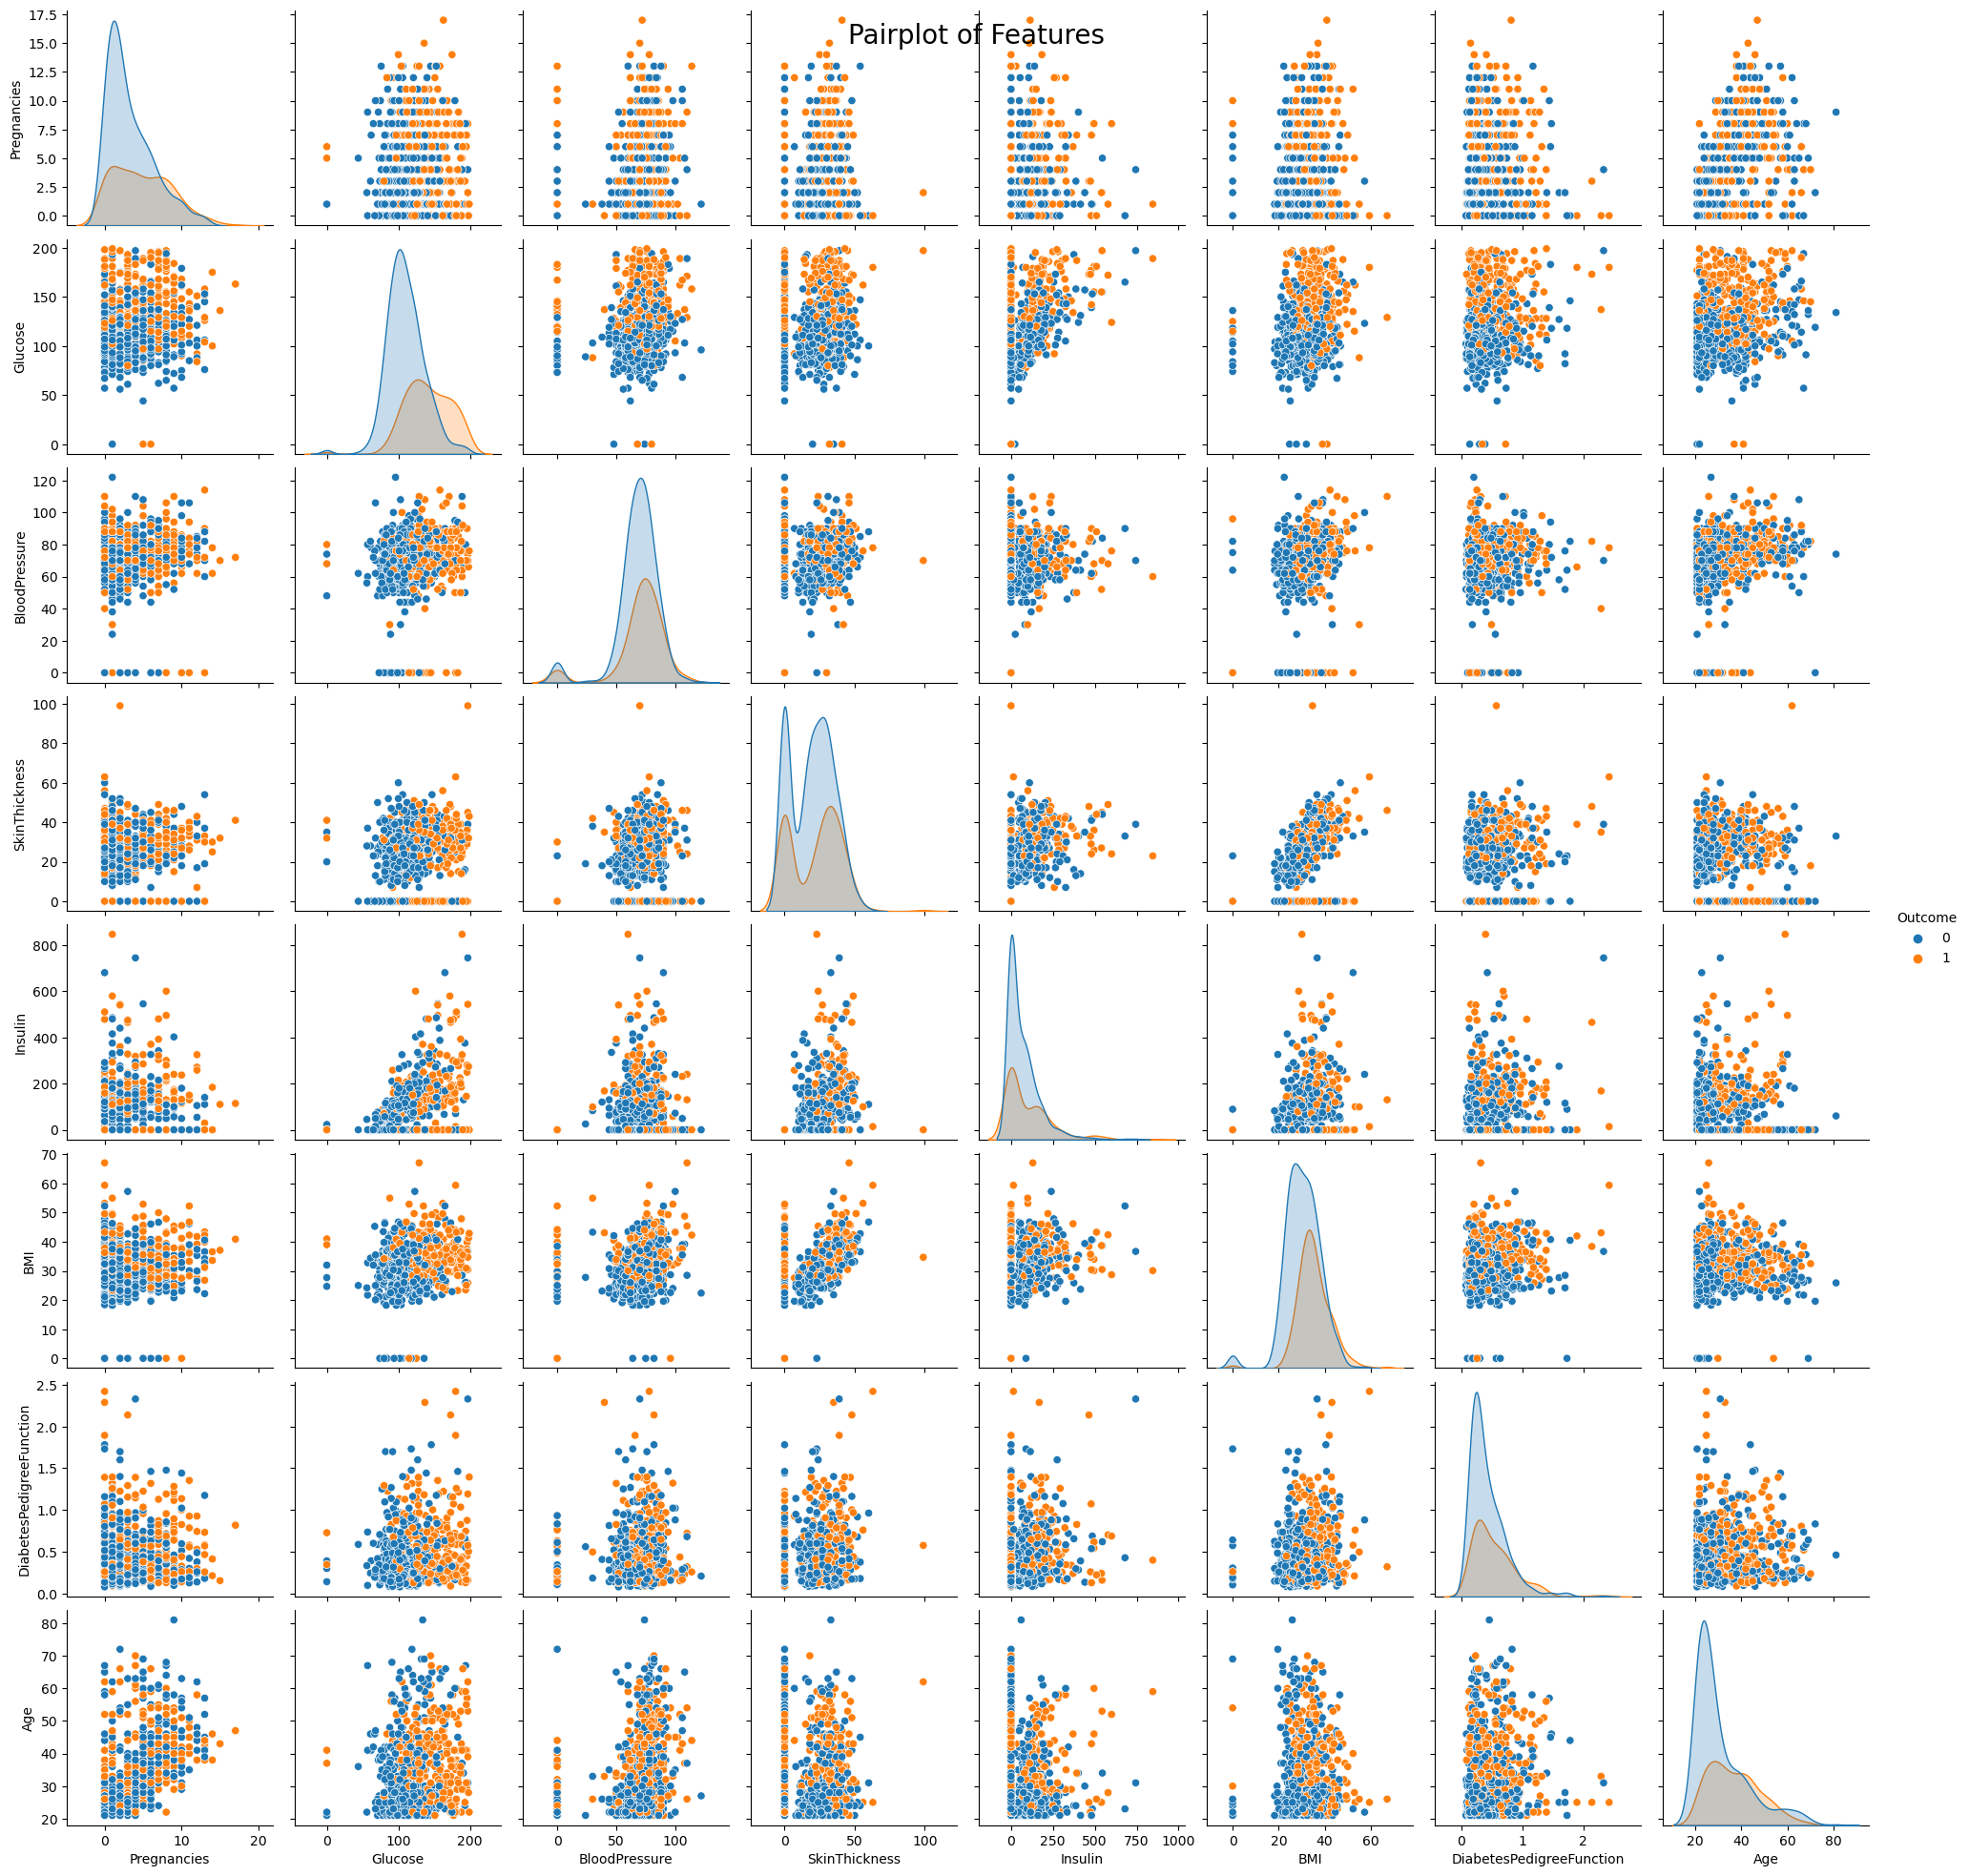

In [8]:
# Pairplot to visualize relationships between variables
sns.pairplot(df, hue='Outcome')
plt.suptitle('Pairplot of Features', size=20)
plt.savefig('Pairplot.png')
plt.show()


The pairplot provided offers insights into the relationships between features and the target variable (Outcome).

1. **Pregnancies**:
   - Higher number of pregnancies seems more common in individuals with diabetes (orange points).

2. **Glucose**:
   - There is a clear distinction in glucose levels between those with and without diabetes. Individuals with diabetes (orange points) tend to have higher glucose levels.

3. **BloodPressure**:
   - There is a slight difference, with a trend showing that individuals with diabetes might have a slightly higher blood pressure, but this is less pronounced compared to glucose levels.

4. **SkinThickness**:
   - The relationship between skin thickness and diabetes is not very clear, suggesting that skin thickness alone might not be a strong indicator of diabetes.

5. **Insulin**:
   - Higher insulin levels are more associated with individuals with diabetes, but there's a lot of overlap between the two classes.

6. **BMI**:
   - Higher BMI values are somewhat more common among individuals with diabetes, though there's considerable overlap.

7. **DiabetesPedigreeFunction**:
   - Higher values of the diabetes pedigree function are more common among individuals with diabetes.

8. **Age**:
   - Older individuals are more likely to have diabetes, though diabetes occurs across a range of ages.

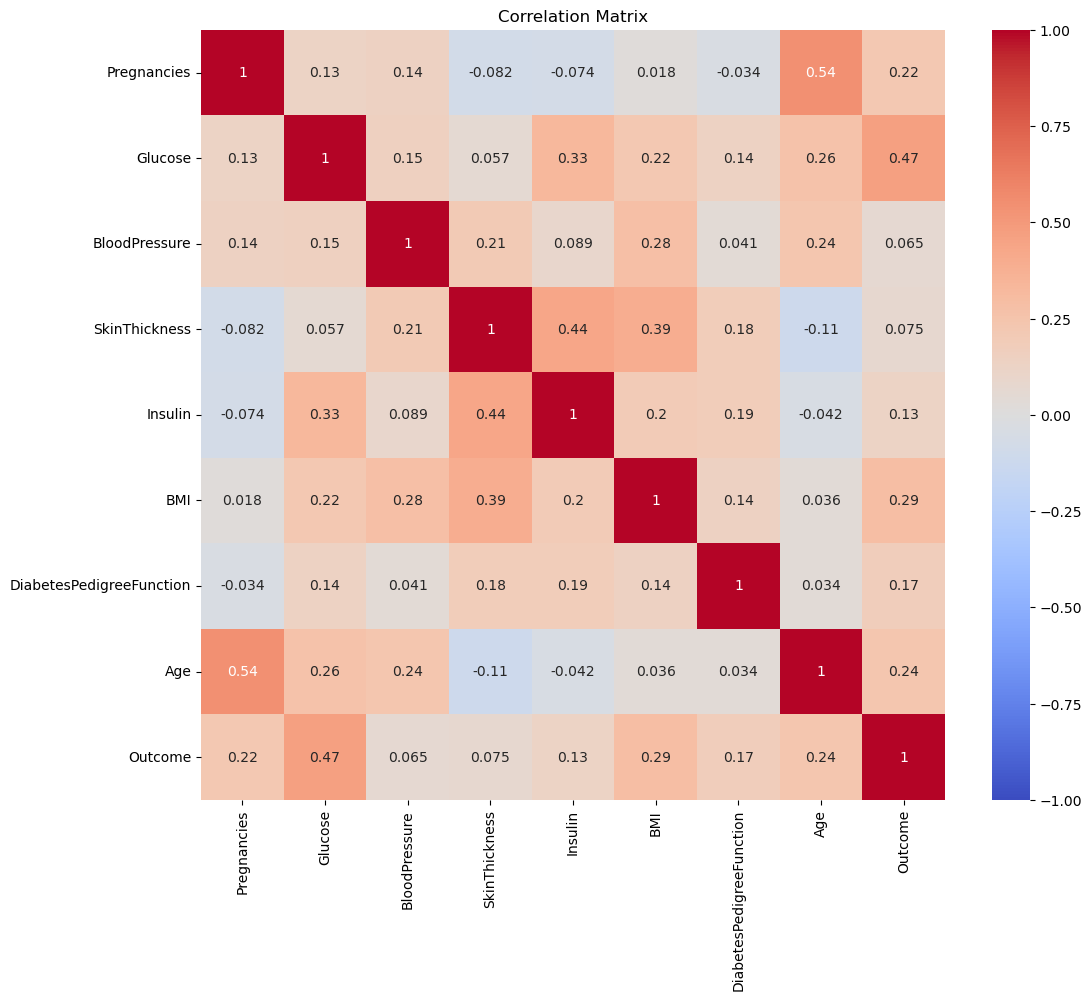

In [9]:
# Correlation matrix
corr_matrix = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.savefig('correlation_matrix.png')
plt.show()


The correlation heatmap provides insights into the relationships between different features and the target variable (Outcome). Here's a detailed interpretation:

1. **Pregnancies**:
   - Moderate positive correlation with Age (0.54), indicating that older individuals tend to have more pregnancies.
   - Positive correlation with Outcome (0.22), suggesting that a higher number of pregnancies is associated with a higher likelihood of diabetes.

2. **Glucose**:
   - Strong positive correlation with Outcome (0.47), indicating that higher glucose levels are strongly associated with diabetes.
   - Moderate positive correlation with Insulin (0.33), BMI (0.22), and Age (0.26), suggesting that individuals with higher glucose levels also tend to have higher insulin levels, higher BMI, and are slightly older.

3. **Blood Pressure**:
   - Weak positive correlation with Outcome (0.065), indicating a slight association with diabetes, but not strong enough to be considered a significant predictor on its own.
   - Moderate positive correlations with SkinThickness (0.21), Insulin (0.089), and BMI (0.28), indicating these features tend to increase together.

4. **Skin Thickness**:
   - Weak positive correlation with Outcome (0.075), indicating a slight association with diabetes.
   - Moderate positive correlation with Insulin (0.44) and BMI (0.39), suggesting individuals with higher skin thickness also tend to have higher insulin levels and BMI.

5. **Insulin**:
   - Weak positive correlation with Outcome (0.13), indicating some association with diabetes.
   - Stronger correlations with Glucose (0.33), SkinThickness (0.44), and BMI (0.2), suggesting that higher insulin levels are associated with higher glucose levels, skin thickness, and BMI.

6. **BMI**:
   - Moderate positive correlation with Outcome (0.29), indicating that higher BMI is associated with a higher likelihood of diabetes.
   - Moderate positive correlations with Glucose (0.22), Blood Pressure (0.28), SkinThickness (0.39), and Insulin (0.2), indicating these features tend to increase together.

7. **Diabetes Pedigree Function**:
   - Weak positive correlation with Outcome (0.17), indicating some association with diabetes.
   - Weak to moderate correlations with other features, suggesting it is a relatively independent factor.

8. **Age**:
   - Positive correlation with Outcome (0.24), indicating that older age is associated with a higher likelihood of diabetes.
   - Strong positive correlation with Pregnancies (0.54), indicating that older individuals tend to have more pregnancies.
   - Moderate correlations with Glucose (0.26), Blood Pressure (0.24), and BMI (0.036), suggesting these features tend to increase with age.


- **Strong Indicators of Diabetes**:
  - **Glucose**: Strongest correlation with Outcome (0.47), making it a key predictor.
  - **BMI**: Moderate correlation with Outcome (0.29).
  - **Pregnancies**: Moderate correlation with Outcome (0.22).

- **Moderate Indicators of Diabetes**:
  - **Age**: Positive correlation with Outcome (0.24).
  - **DiabetesPedigreeFunction**: Positive correlation with Outcome (0.17).

- **Weak Indicators of Diabetes**:
  - **BloodPressure** and **SkinThickness**: Weak correlations with Outcome (0.065 and 0.075 respectively).
  - **Insulin**: Weak correlation with Outcome (0.13).



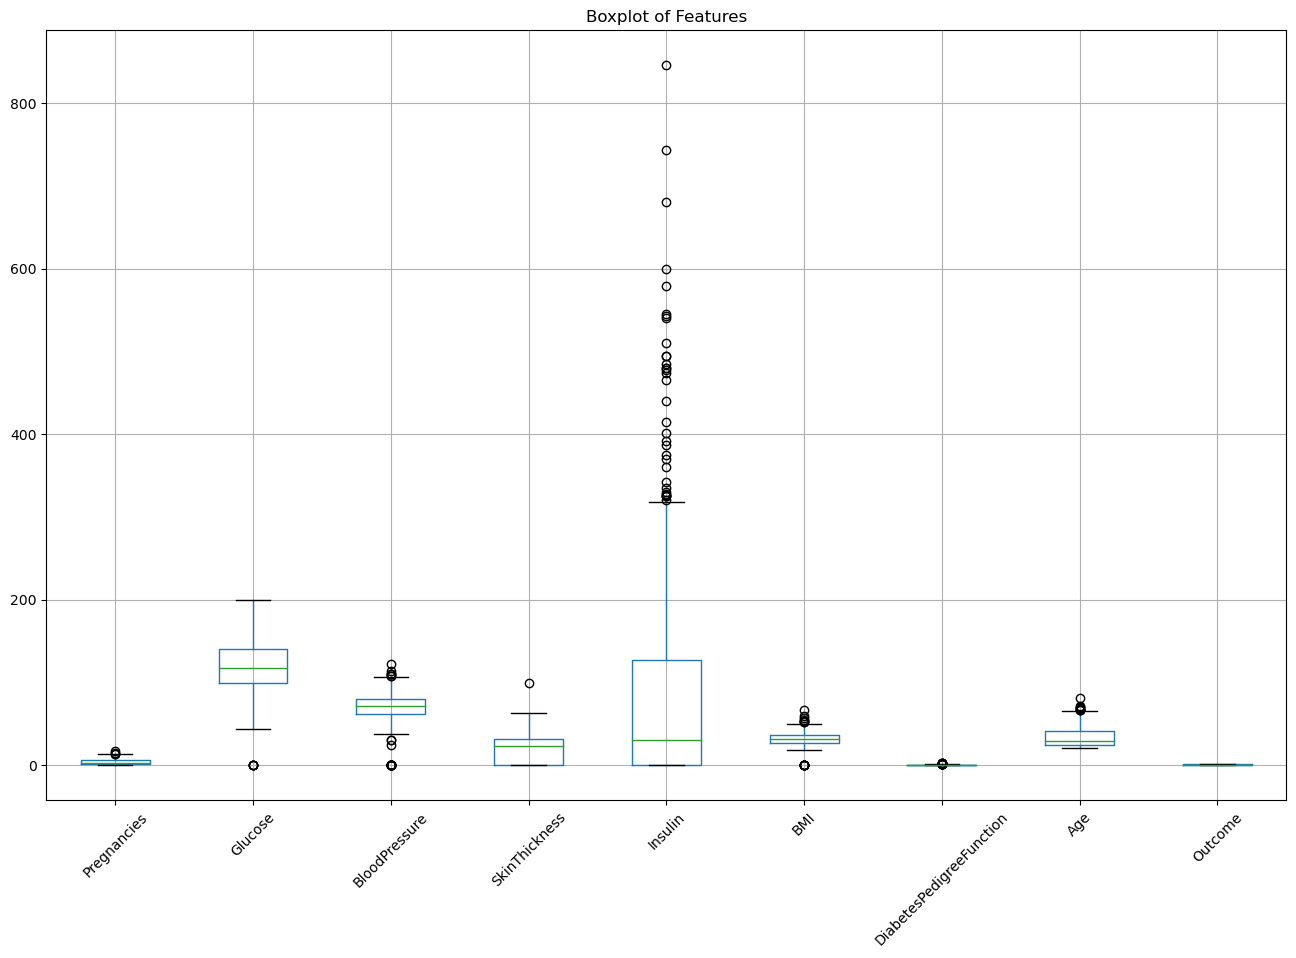

In [10]:
# Boxplot to detect outliers
plt.figure(figsize=(16, 10))
df.boxplot()
plt.title('Boxplot of Features')
plt.xticks(rotation=45)
plt.savefig('boxplot.jpg')
plt.show()

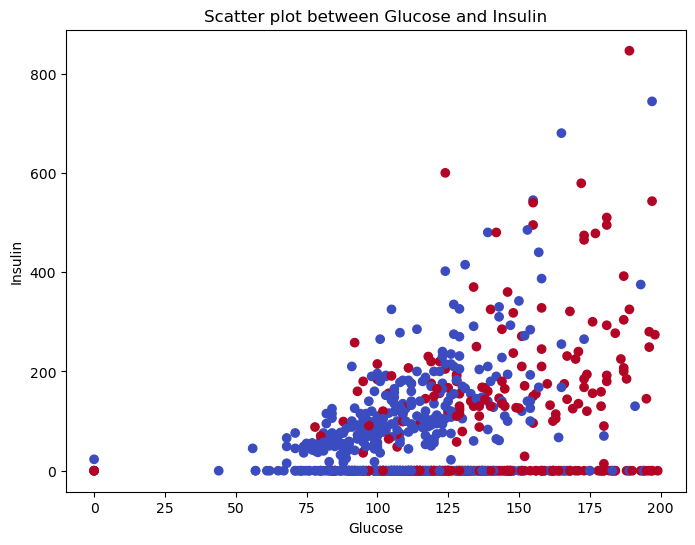

In [11]:
# Scatter plot to visualize relationships between specific features
plt.figure(figsize=(8, 6))
plt.scatter(df['Glucose'], df['Insulin'], c=df['Outcome'], cmap='coolwarm')
plt.title('Scatter plot between Glucose and Insulin')
plt.xlabel('Glucose')
plt.ylabel('Insulin')
plt.show()

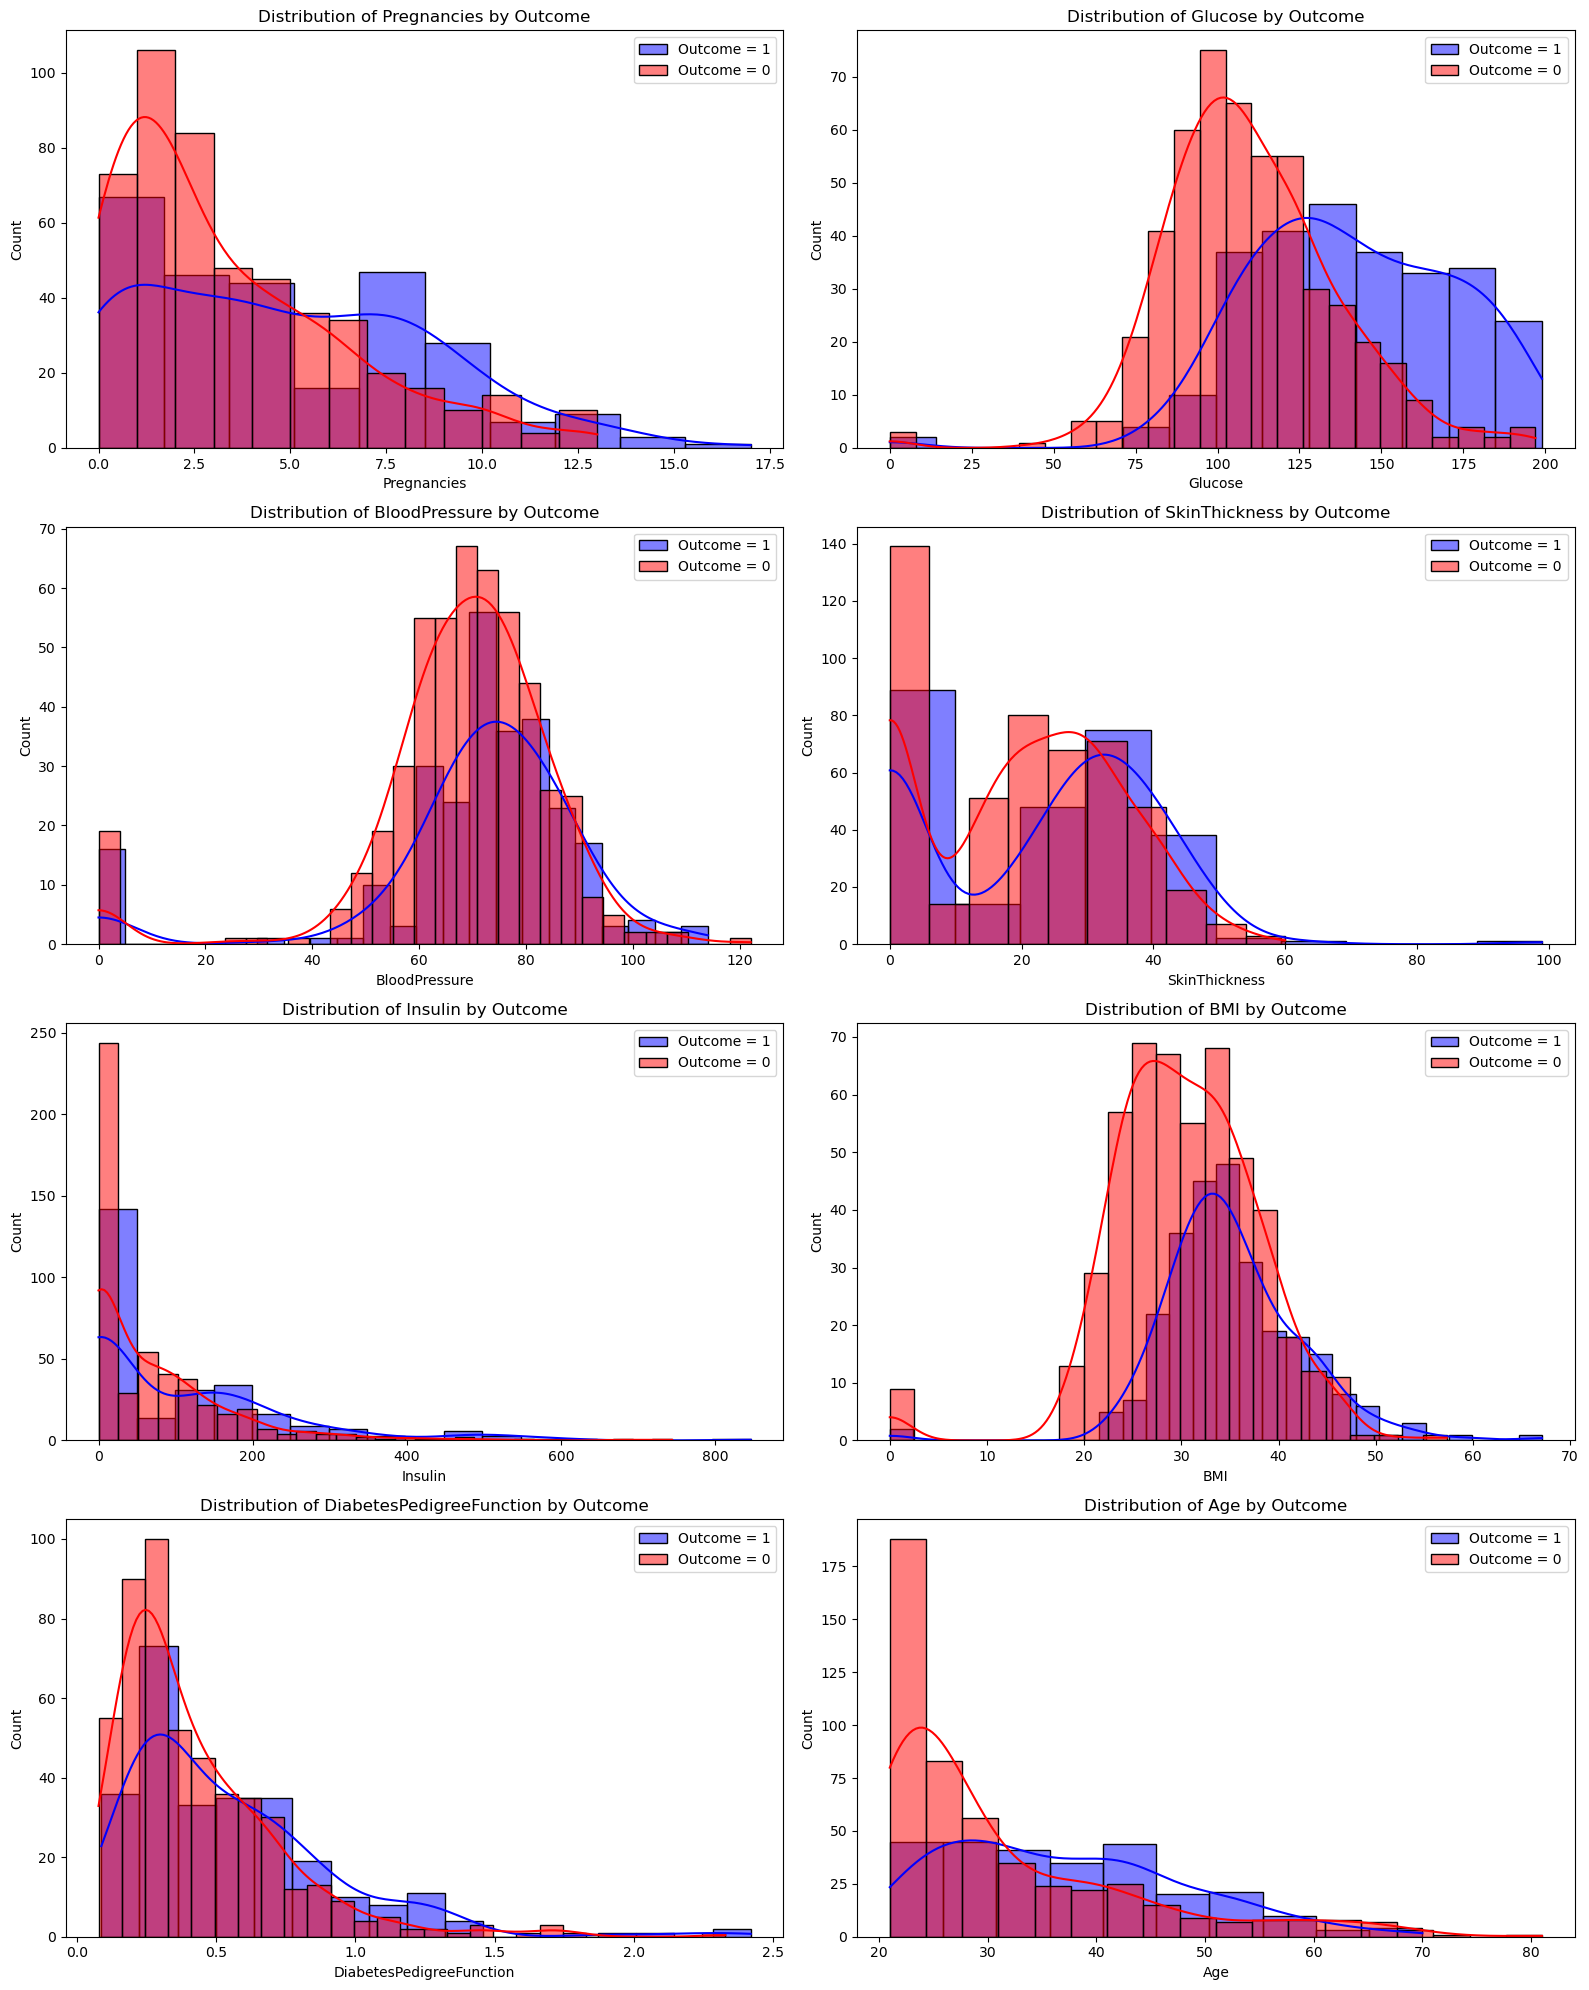

In [12]:
# Feature distribution based on the Outcome
features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

plt.figure(figsize=(16, 20))
for i, feature in enumerate(features, 1):
    plt.subplot(4, 2, i)
    sns.histplot(df[feature][df['Outcome'] == 1], color='blue', kde=True, label='Outcome = 1')
    sns.histplot(df[feature][df['Outcome'] == 0], color='red', kde=True, label='Outcome = 0')
    plt.legend()
    plt.title(f'Distribution of {feature} by Outcome')
plt.tight_layout()
plt.show()

## Model development

In [5]:
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

## Logistic regression

In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
# Check for missing values
print(df.isnull().sum())

# Fill missing values with the mean of the column (if any)
df.fillna(df.mean(), inplace=True)

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [3]:

# Standardize the features (optional but recommended for logistic regression)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
df[features] = scaler.fit_transform(df[features])

In [4]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

NameError: name 'train_test_split' is not defined

In [13]:
model = LogisticRegression()

model.fit(X_train, y_train)

LogisticRegression()

In [22]:
X_test.head()

Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
668     0.639947 -0.716533      -0.574128       0.781814  0.956860  0.254780   
324    -0.547919 -0.278373       0.304734       0.719086 -0.692891  0.470543   
624    -0.547919 -0.403562      -0.263941      -1.288212 -0.692891 -0.151361   
690     1.233880 -0.434859       0.563223      -1.288212 -0.692891 -0.938260   
473     0.936914  0.472758       1.080200      -1.288212 -0.692891 -0.265588   

     DiabetesPedigreeFunction       Age  
668                 -0.126471  0.830381  
324                 -0.978145 -1.041549  
624                 -0.947944 -1.041549  
690                  1.160099  0.064591  
473                 -0.790898  1.425995

In [21]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
      dtype=int64)

In [16]:
# Make predictions
y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)[:, 1]

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)
print("ROC-AUC Score:", roc_auc)

Accuracy: 0.7532467532467533
Confusion Matrix:
 [[79 20]
 [18 37]]
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.80      0.81        99
           1       0.65      0.67      0.66        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154

ROC-AUC Score: 0.8146923783287419


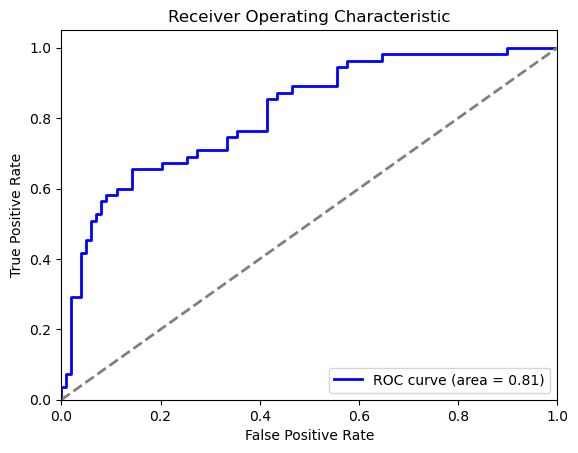

In [17]:
# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

## Decision Tree and Random Forest

Decision Tree Metrics:
Accuracy: 0.7467532467532467
Precision: 0.625
Recall: 0.7272727272727273
F1 Score: 0.6722689075630253
ROC-AUC Score: 0.7424242424242424
Confusion Matrix:
 [[75 24]
 [15 40]]

Random Forest Metrics:
Best Parameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 300}
Best Cross-Validation Score (ROC-AUC): 0.8416312736693874
Test Accuracy: 0.7662337662337663
Precision: 0.6666666666666666
Recall: 0.6909090909090909
F1 Score: 0.6785714285714286
ROC-AUC Score: 0.8306703397612488
Confusion Matrix:
 [[80 19]
 [17 38]]


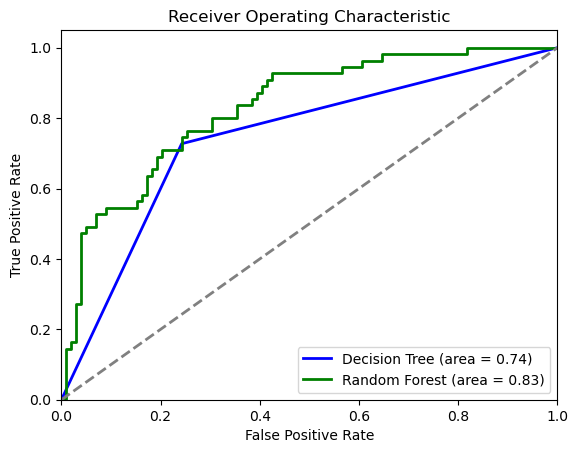

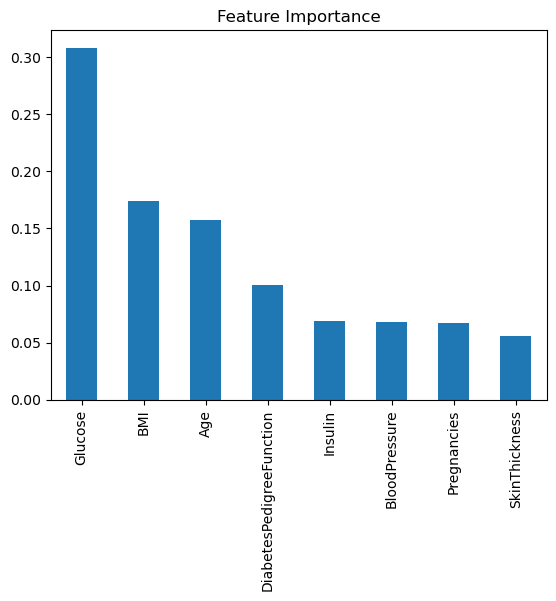

In [18]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
df[features] = scaler.fit_transform(df[features])

# Split the dataset into training and testing sets
X = df.drop('Outcome', axis=1)
y = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Decision Tree model
decision_tree_model = DecisionTreeClassifier(random_state=42)
decision_tree_model.fit(X_train, y_train)

# Initialize and train the Random Forest model with hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, scoring='roc_auc')
grid_search.fit(X_train, y_train)

best_rf_model = grid_search.best_estimator_

# Predictions for Decision Tree
y_pred_tree = decision_tree_model.predict(X_test)
y_pred_prob_tree = decision_tree_model.predict_proba(X_test)[:, 1]

# Predictions for Random Forest
y_pred_rf = best_rf_model.predict(X_test)
y_pred_prob_rf = best_rf_model.predict_proba(X_test)[:, 1]

# Evaluation Metrics for Decision Tree
accuracy_tree = accuracy_score(y_test, y_pred_tree)
precision_tree = precision_score(y_test, y_pred_tree)
recall_tree = recall_score(y_test, y_pred_tree)
f1_tree = f1_score(y_test, y_pred_tree)
roc_auc_tree = roc_auc_score(y_test, y_pred_prob_tree)
conf_matrix_tree = confusion_matrix(y_test, y_pred_tree)

print("Decision Tree Metrics:")
print("Accuracy:", accuracy_tree)
print("Precision:", precision_tree)
print("Recall:", recall_tree)
print("F1 Score:", f1_tree)
print("ROC-AUC Score:", roc_auc_tree)
print("Confusion Matrix:\n", conf_matrix_tree)

# Evaluation Metrics for Random Forest
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
roc_auc_rf = roc_auc_score(y_test, y_pred_prob_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

print("\nRandom Forest Metrics:")
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score (ROC-AUC):", grid_search.best_score_)
print("Test Accuracy:", accuracy_rf)
print("Precision:", precision_rf)
print("Recall:", recall_rf)
print("F1 Score:", f1_rf)
print("ROC-AUC Score:", roc_auc_rf)
print("Confusion Matrix:\n", conf_matrix_rf)

# Plot ROC Curves
fpr_tree, tpr_tree, _ = roc_curve(y_test, y_pred_prob_tree)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_prob_rf)

plt.figure()
plt.plot(fpr_tree, tpr_tree, color='blue', lw=2, label='Decision Tree (area = %0.2f)' % roc_auc_tree)
plt.plot(fpr_rf, tpr_rf, color='green', lw=2, label='Random Forest (area = %0.2f)' % roc_auc_rf)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Feature Importance for Random Forest
feature_importances = pd.Series(best_rf_model.feature_importances_, index=X.columns)
feature_importances.sort_values(ascending=False).plot(kind='bar')
plt.title('Feature Importance')
plt.show()


The code begins by initializing and training a Decision Tree model using the training dataset, with a random state set to 42 for reproducibility. After fitting the Decision Tree model to the training data, it proceeds to initialize a Random Forest model and perform hyperparameter tuning using GridSearchCV. The hyperparameter grid includes the number of estimators (`n_estimators`), maximum depth of the trees (`max_depth`), minimum samples required to split an internal node (`min_samples_split`), and minimum samples required to be at a leaf node (`min_samples_leaf`). GridSearchCV is configured with a 5-fold cross-validation and evaluates the models based on the ROC-AUC score. Once the best parameters are found, the Random Forest model is trained with these optimal parameters.

For both models, predictions are made on the test set, and the predicted probabilities are computed for ROC-AUC evaluation. The code then calculates several evaluation metrics for both models, including accuracy, precision, recall, F1 score, ROC-AUC score, and confusion matrix. These metrics are printed to provide a comprehensive understanding of each model's performance.

The ROC curves for both models are plotted to visually compare their performance, showing the trade-off between the true positive rate and the false positive rate. Additionally, the feature importance for the Random Forest model is plotted, highlighting the contributions of each feature to the model's predictions. This thorough evaluation and comparison provide valuable insights into the models' effectiveness and the importance of different features in predicting the outcome.

# SVM and Logistic Regression

Logistic Regression Metrics:
Accuracy: 0.7532467532467533
Precision: 0.6491228070175439
Recall: 0.6727272727272727
F1 Score: 0.6607142857142858
ROC-AUC Score: 0.8146923783287419
Confusion Matrix:
 [[79 20]
 [18 37]]

Support Vector Machine (SVM) Metrics:
Best Parameters: {'C': 100, 'gamma': 'scale', 'kernel': 'linear'}
Best Cross-Validation Score (ROC-AUC): 0.8338008080062345
Test Accuracy: 0.7597402597402597
Precision: 0.6666666666666666
Recall: 0.6545454545454545
F1 Score: 0.6605504587155963
ROC-AUC Score: 0.8168044077134986
Confusion Matrix:
 [[81 18]
 [19 36]]


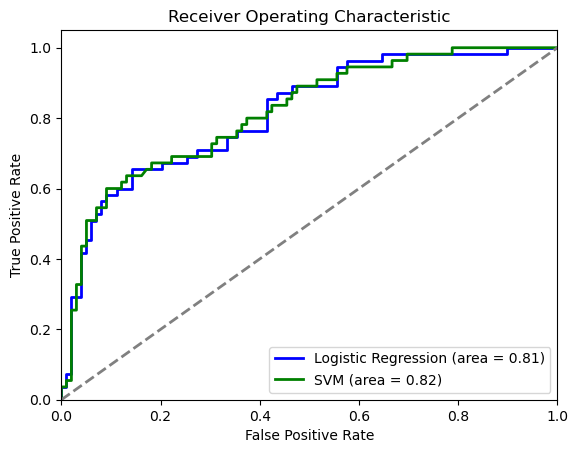

In [19]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
df[features] = scaler.fit_transform(df[features])

# Split the dataset into training and testing sets
X = df.drop('Outcome', axis=1)
y = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Logistic Regression model
logistic_regression_model = LogisticRegression(random_state=42, max_iter=1000)
logistic_regression_model.fit(X_train, y_train)

# Initialize and train the SVM model with hyperparameter tuning
param_grid_svm = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma': ['scale', 'auto']
}

svm = SVC(probability=True, random_state=42)
grid_search_svm = GridSearchCV(estimator=svm, param_grid=param_grid_svm, cv=5, n_jobs=-1, scoring='roc_auc')
grid_search_svm.fit(X_train, y_train)

best_svm_model = grid_search_svm.best_estimator_

# Predictions for Logistic Regression
y_pred_logistic = logistic_regression_model.predict(X_test)
y_pred_prob_logistic = logistic_regression_model.predict_proba(X_test)[:, 1]

# Predictions for SVM
y_pred_svm = best_svm_model.predict(X_test)
y_pred_prob_svm = best_svm_model.predict_proba(X_test)[:, 1]

# Evaluation Metrics for Logistic Regression
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
precision_logistic = precision_score(y_test, y_pred_logistic)
recall_logistic = recall_score(y_test, y_pred_logistic)
f1_logistic = f1_score(y_test, y_pred_logistic)
roc_auc_logistic = roc_auc_score(y_test, y_pred_prob_logistic)
conf_matrix_logistic = confusion_matrix(y_test, y_pred_logistic)

print("Logistic Regression Metrics:")
print("Accuracy:", accuracy_logistic)
print("Precision:", precision_logistic)
print("Recall:", recall_logistic)
print("F1 Score:", f1_logistic)
print("ROC-AUC Score:", roc_auc_logistic)
print("Confusion Matrix:\n", conf_matrix_logistic)

# Evaluation Metrics for SVM
accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm)
recall_svm = recall_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm)
roc_auc_svm = roc_auc_score(y_test, y_pred_prob_svm)
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)

print("\nSupport Vector Machine (SVM) Metrics:")
print("Best Parameters:", grid_search_svm.best_params_)
print("Best Cross-Validation Score (ROC-AUC):", grid_search_svm.best_score_)
print("Test Accuracy:", accuracy_svm)
print("Precision:", precision_svm)
print("Recall:", recall_svm)
print("F1 Score:", f1_svm)
print("ROC-AUC Score:", roc_auc_svm)
print("Confusion Matrix:\n", conf_matrix_svm)

# Plot ROC Curves
fpr_logistic, tpr_logistic, _ = roc_curve(y_test, y_pred_prob_logistic)
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_pred_prob_svm)

plt.figure()
plt.plot(fpr_logistic, tpr_logistic, color='blue', lw=2, label='Logistic Regression (area = %0.2f)' % roc_auc_logistic)
plt.plot(fpr_svm, tpr_svm, color='green', lw=2, label='SVM (area = %0.2f)' % roc_auc_svm)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


## ROC curve of all machine learning models

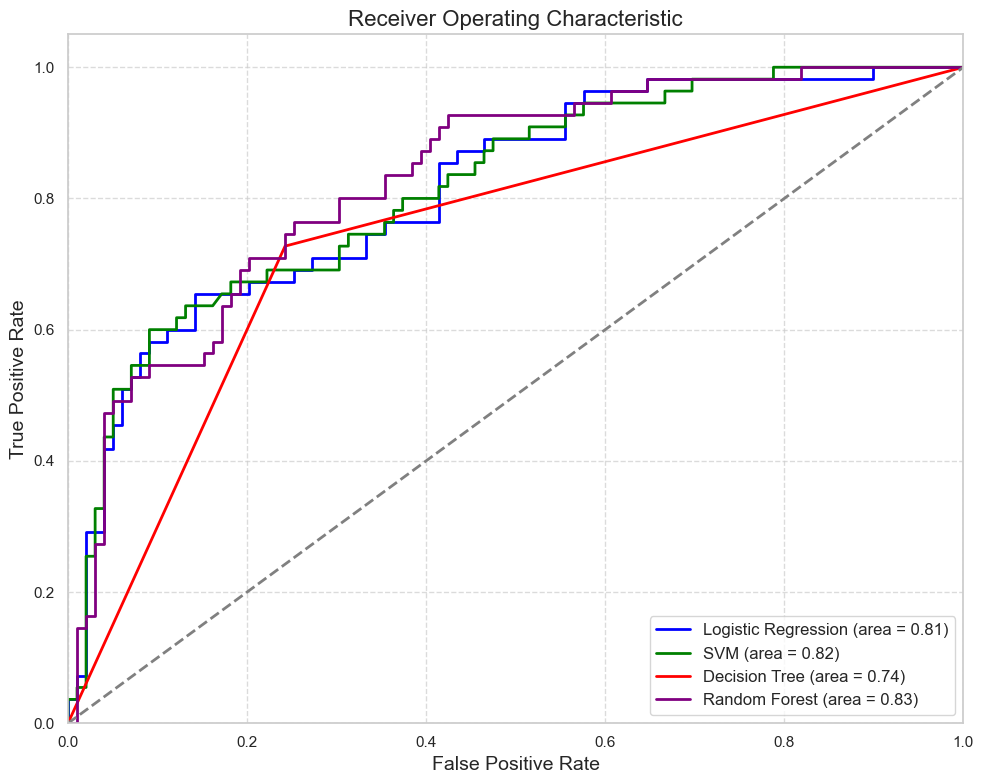

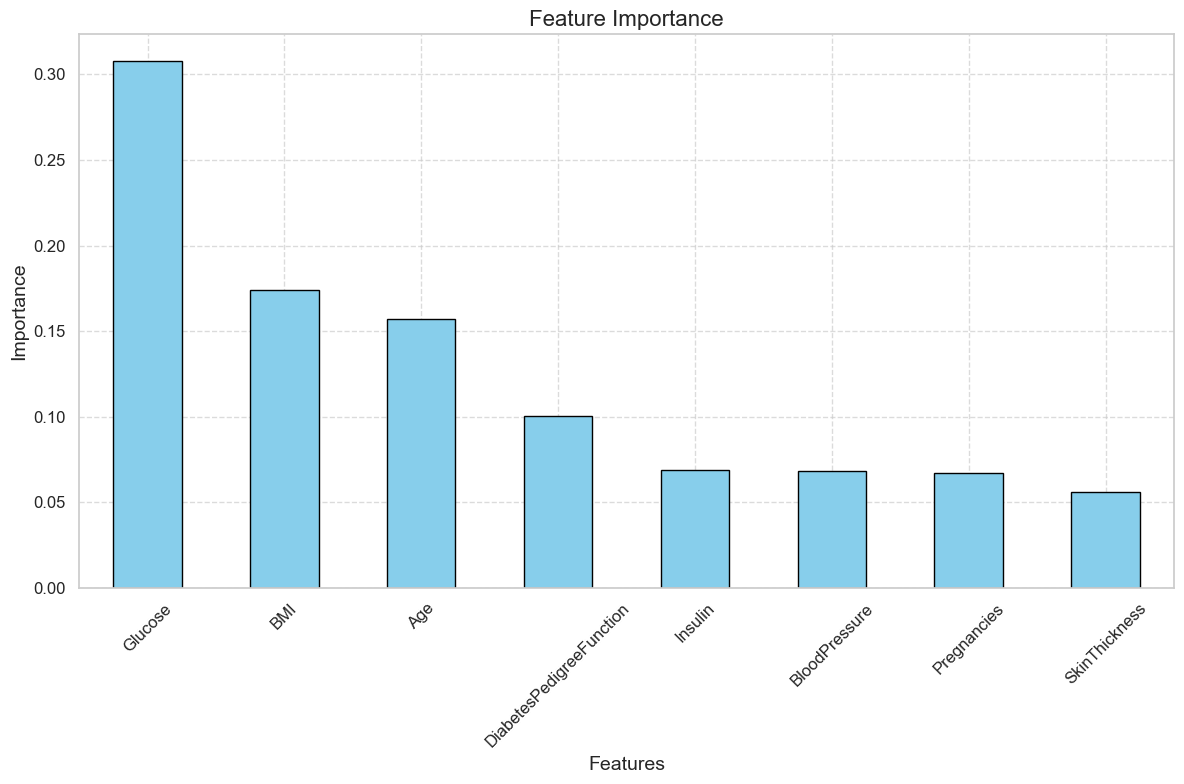

In [20]:
import seaborn as sns

# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Plot ROC Curves for all models together
plt.figure(figsize=(10, 8))
plt.plot(fpr_logistic, tpr_logistic, color='blue', lw=2, label='Logistic Regression (area = %0.2f)' % roc_auc_logistic)
plt.plot(fpr_svm, tpr_svm, color='green', lw=2, label='SVM (area = %0.2f)' % roc_auc_svm)
plt.plot(fpr_tree, tpr_tree, color='red', lw=2, label='Decision Tree (area = %0.2f)' % roc_auc_tree)
plt.plot(fpr_rf, tpr_rf, color='purple', lw=2, label='Random Forest (area = %0.2f)' % roc_auc_rf)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('Receiver Operating Characteristic', fontsize=16)
plt.legend(loc="lower right", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('roc_curves.png')  # Save the ROC curves plot as an image
plt.show()

# Feature Importance for Random Forest
plt.figure(figsize=(12, 8))
feature_importances = pd.Series(best_rf_model.feature_importances_, index=X.columns)
feature_importances.sort_values(ascending=False).plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Feature Importance', fontsize=16)
plt.xlabel('Features', fontsize=14)
plt.ylabel('Importance', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('feature_importance.png')  # Save the feature importance plot as an image
plt.show()


### Interpretation of the Updated ROC Curve

The updated ROC curve shows the performance of four different models (Logistic Regression, SVM, Decision Tree, and Random Forest) on the PIMA Indian Diabetes dataset. The curve plots the True Positive Rate (TPR) against the False Positive Rate (FPR), and the area under the ROC curve (AUC) quantifies the model's ability to distinguish between positive and negative classes.

1. **Logistic Regression (Blue) - AUC: 0.81**
   - The logistic regression model has an AUC of 0.81, indicating a good discriminative ability. The curve is relatively close to the top-left corner, suggesting a high true positive rate and a low false positive rate.

2. **Support Vector Machine (SVM) (Green) - AUC: 0.82**
   - The SVM model has a slightly better AUC of 0.82 compared to the logistic regression model. This indicates that the SVM model has a slightly better performance in distinguishing between positive and negative classes.

3. **Decision Tree (Red) - AUC: 0.74**
   - The decision tree model has the lowest AUC of 0.74 among the four models. This indicates that the decision tree model is less effective at distinguishing between the classes compared to the other models. The ROC curve for the decision tree is further from the top-left corner, indicating lower sensitivity and specificity.

4. **Random Forest (Purple) - AUC: 0.83**
   - The random forest model has the highest AUC of 0.83. This suggests that the random forest model has the best discriminative ability among the four models. The ROC curve is the closest to the top-left corner, indicating the highest true positive rate and the lowest false positive rate.

### Key Points:

- **Performance Comparison:**
  - The Random Forest model outperforms the other models with an AUC of 0.83, showing the highest discriminative power.
  - The SVM model follows closely with an AUC of 0.82.
  - The Logistic Regression model has an AUC of 0.81, indicating good performance but slightly less effective than SVM and Random Forest.
  - The Decision Tree model has the lowest AUC of 0.74, indicating it is the least effective model for this dataset in distinguishing between the positive and negative classes.

- **Model Selection:**
  - Based on the AUC, the Random Forest model is the best choice for this dataset, followed by the SVM model. Logistic Regression also performs well, but the Decision Tree model is less effective.

- **ROC Curve Analysis:**
  - The ROC curve for each model helps in understanding the trade-off between the true positive rate and the false positive rate at different thresholds. Models with curves closer to the top-left corner are generally preferred as they indicate higher sensitivity (true positive rate) and specificity (true negative rate).

### Conclusion:

The ROC curve and AUC values indicate that the Random Forest model has the best performance in discriminating between the positive and negative classes for the given dataset, followed closely by the SVM model. The Logistic Regression model also performs well, while the Decision Tree model is less effective. This comprehensive comparison using ROC curves provides valuable insights into the relative performance of each model.

### Interpretation of the Feature Importance Plot

The feature importance plot from the Random Forest model shows the relative importance of each feature in predicting the outcome. Here's a detailed interpretation:

1. **Glucose (≈ 0.30)**
   - Glucose is the most important feature, with a feature importance score of approximately 0.30. This indicates that glucose levels play a significant role in predicting diabetes, which aligns with medical understanding, as high blood glucose levels are a primary indicator of diabetes.

2. **BMI (Body Mass Index) (≈ 0.18)**
   - BMI is the second most important feature, with a score of around 0.18. BMI is a measure of body fat based on height and weight, and higher BMI values are often associated with a higher risk of diabetes.

3. **Age (≈ 0.16)**
   - Age has a feature importance score of approximately 0.16, making it the third most important feature. Age is a known risk factor for diabetes, with the likelihood of developing diabetes increasing as people get older.

4. **Diabetes Pedigree Function (≈ 0.10)**
   - This feature, which represents a genetic propensity for diabetes, has a score of about 0.10. It indicates that the genetic likelihood of diabetes is an important predictor.

5. **Insulin (≈ 0.07)**
   - Insulin has a feature importance score of around 0.07. Insulin levels can be indicative of how the body regulates blood glucose, thus influencing the prediction of diabetes.

6. **BloodPressure (≈ 0.06)**
   - Blood pressure has a feature importance score of about 0.06. Although it is a less significant predictor compared to glucose and BMI, it still plays a role in predicting diabetes.

7. **Pregnancies (≈ 0.05)**
   - The number of pregnancies has a feature importance score of approximately 0.05. This feature is relevant as a higher number of pregnancies may be associated with a higher risk of gestational diabetes, which can increase the risk of type 2 diabetes later in life.

8. **SkinThickness (≈ 0.04)**
   - Skin thickness, with a feature importance score of around 0.04, is the least important feature among those listed. It is a measure that can be related to body fat and insulin resistance but is less directly indicative of diabetes compared to the other features.

### Summary

The feature importance plot reveals that glucose levels, BMI, and age are the most significant predictors of diabetes in the dataset, followed by the diabetes pedigree function and insulin levels. Blood pressure, number of pregnancies, and skin thickness also contribute to the prediction but to a lesser extent. Understanding these feature importances helps in interpreting the model's decision-making process and aligns with known medical risk factors for diabetes.

In [21]:
import pandas as pd

# Data for the table
data = {
    "Model": ["Logistic Regression", "Support Vector Machine", "Decision Tree", "Random Forest"],
    "Accuracy": [accuracy_logistic, accuracy_svm, accuracy_tree, accuracy_rf],
    "Precision": [precision_logistic, precision_svm, precision_tree, precision_rf],
    "Recall": [recall_logistic, recall_svm, recall_tree, recall_rf],
    "F1 Score": [f1_logistic, f1_svm, f1_tree, f1_rf],
    "ROC-AUC": [roc_auc_logistic, roc_auc_svm, roc_auc_tree, roc_auc_rf]
}

# Create DataFrame
summary_table = pd.DataFrame(data)

# Display the table
summary_table


Model  Accuracy  Precision    Recall  F1 Score   ROC-AUC
0     Logistic Regression  0.753247   0.649123  0.672727  0.660714  0.814692
1  Support Vector Machine  0.759740   0.666667  0.654545  0.660550  0.816804
2           Decision Tree  0.746753   0.625000  0.727273  0.672269  0.742424
3           Random Forest  0.766234   0.666667  0.690909  0.678571  0.830670

In [22]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

## Simple Dense Neural network 

In [110]:
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score, roc_auc_score
import numpy as np
import pandas as pd

# Normalize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the model with a unique name
model_name = "dense_model_v1"
dense_model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X_train.shape[1],)),  # Input layer
    tf.keras.layers.Dense(128, activation='relu'),  # Increased units for more complexity
    tf.keras.layers.Dropout(0.3),  # Dropout for regularization
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1, activation='sigmoid')
], name=model_name)

# Compile the model
dense_model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model with increased epochs and batch size
dense_model.fit(X_train, y_train, epochs=100, batch_size=64, validation_data=(X_test, y_test))

# Predict probabilities
y_pred_prob = dense_model.predict(X_test)
y_pred = np.round(y_pred_prob).astype(int)

# Calculate and print metrics

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)


print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'ROC-AUC Score: {roc_auc:.4f}')

# Print classification report and final accuracy
print(classification_report(y_test, y_pred))

# Save the model
dense_model.save(f"{model_name}.h5")
print(f'Model saved as {model_name}.h5')


Precision: 0.6667
Recall: 0.6545
F1 Score: 0.6606
ROC-AUC Score: 0.7976
              precision    recall  f1-score   support

           0       0.81      0.82      0.81        99
           1       0.67      0.65      0.66        55

    accuracy                           0.76       154
   macro avg       0.74      0.74      0.74       154
weighted avg       0.76      0.76      0.76       154

Model saved as dense_model_v1.h5


## LSTM network 

In [34]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score, roc_auc_score
import numpy as np
import pandas as pd
import lime.lime_tabular

# Assuming you have already loaded your dataset into X and y
# X = ... (your feature matrix)
# y = ... (your labels)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshape X to be 3-dimensional for LSTM input (samples, time steps, features)
X_train_reshaped = X_train_scaled[:, :, np.newaxis]
X_test_reshaped = X_test_scaled[:, :, np.newaxis]

# Define the LSTM model
model_name = "lstm_model_v1"
lstm_model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])),
    tf.keras.layers.LSTM(128, return_sequences=True),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.LSTM(64, return_sequences=True),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.LSTM(32),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1, activation='sigmoid')
], name=model_name)

# Compile the model
lstm_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.005),
                   loss='binary_crossentropy',
                   metrics=['accuracy'])

# Train the model
lstm_model.fit(X_train_reshaped, y_train, epochs=50, batch_size=64, validation_data=(X_test_reshaped, y_test))

# Predict probabilities
y_pred_prob = lstm_model.predict(X_test_reshaped)
y_pred = np.round(y_pred_prob).astype(int)

# Calculate and print metrics
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)

print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'ROC-AUC Score: {roc_auc:.4f}')

# Print classification report
print(classification_report(y_test, y_pred))

# Save the model
lstm_model.save(f"{model_name}.h5")
print(f'Model saved as {model_name}.h5')




Epoch 1/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 18s 230ms/step - accuracy: 0.6491 - loss: 0.6322 - val_accuracy: 0.7338 - val_loss: 0.5329
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.7184 - loss: 0.5628 - val_accuracy: 0.7338 - val_loss: 0.5271
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.7135 - loss: 0.5593 - val_accuracy: 0.7273 - val_loss: 0.5310
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.7128 - loss: 0.5632 - val_accuracy: 0.7273 - val_loss: 0.5188
Epoch 5/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - accuracy: 0.7207 - loss: 0.5575 - val_accuracy: 0.7273 - val_loss: 0.5278
Epoch 6/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.7385 - loss: 0.5451 - val_accuracy: 0.7338 - val_loss: 0.5224
Epoch 7/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.7352 - loss: 0.5452 - val_accuracy: 0.7403 - val_loss: 0.5186
Epoch 8/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.7538 - loss: 0.5299 - val_accuracy: 0.7403 -

Precision: 0.6800
Recall: 0.6182
F1 Score: 0.6476
ROC-AUC Score: 0.7815
              precision    recall  f1-score   support

           0       0.80      0.84      0.82        99
           1       0.68      0.62      0.65        55

    accuracy                           0.76       154
   macro avg       0.74      0.73      0.73       154
weighted avg       0.76      0.76      0.76       154

Model saved as lstm_model_v1.h5


In [6]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score, roc_auc_score
import numpy as np
import pandas as pd


# Assuming you have already loaded your dataset into X and y
# X = ... (your feature matrix)
# y = ... (your labels)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshape X to be 3-dimensional for LSTM input (samples, time steps, features)
X_train_reshaped = X_train_scaled[:, :, np.newaxis]
X_test_reshaped = X_test_scaled[:, :, np.newaxis]

# Define the LSTM model
model_name = "lstm_model_v1"
lstm_model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])),
    tf.keras.layers.LSTM(128, return_sequences=True),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.LSTM(64, return_sequences=True),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.LSTM(32),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1, activation='sigmoid')
], name=model_name)

# Compile the model
lstm_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.005),
                   loss='binary_crossentropy',
                   metrics=['accuracy'])

# Train the model
lstm_model.fit(X_train_reshaped, y_train, epochs=50, batch_size=64, validation_data=(X_test_reshaped, y_test))

# Predict probabilities
y_pred_prob = lstm_model.predict(X_test_reshaped)
y_pred = np.round(y_pred_prob).astype(int)

# Calculate and print metrics
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)

print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'ROC-AUC Score: {roc_auc:.4f}')

# Print classification report
print(classification_report(y_test, y_pred))

# Save the model
lstm_model.save(f"{model_name}.h5")
print(f'Model saved as {model_name}.h5')

Epoch 1/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 14s 208ms/step - accuracy: 0.6165 - loss: 0.6395 - val_accuracy: 0.7338 - val_loss: 0.5654
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.6993 - loss: 0.6015 - val_accuracy: 0.7662 - val_loss: 0.5152
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.7196 - loss: 0.5765 - val_accuracy: 0.7338 - val_loss: 0.5365
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.7200 - loss: 0.5561 - val_accuracy: 0.7403 - val_loss: 0.5242
Epoch 5/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.7375 - loss: 0.5550 - val_accuracy: 0.7403 - val_loss: 0.5193
Epoch 6/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.7237 - loss: 0.5528 - val_accuracy: 0.7468 - val_loss: 0.5250
Epoch 7/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.7361 - loss: 0.5346 - val_accuracy: 0.7532 - val_loss: 0.5134
Epoch 8/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.7120 - loss: 0.5632 - val_accuracy: 0.7273 -

Precision: 0.5902
Recall: 0.6545
F1 Score: 0.6207
ROC-AUC Score: 0.7565
              precision    recall  f1-score   support

           0       0.80      0.75      0.77        99
           1       0.59      0.65      0.62        55

    accuracy                           0.71       154
   macro avg       0.69      0.70      0.70       154
weighted avg       0.72      0.71      0.72       154

Model saved as lstm_model_v1.h5


## LSTM EXPLAINATION USING LIME

In [8]:
import lime.lime_tabular
import numpy as np

# Assuming X_train_scaled, X_test_scaled, and lstm_model are already defined and the LSTM model is trained

# Define the number of features
num_features = X_train_scaled.shape[1]  # Number of features in the dataset

# Define feature names for the LIME explainer
feature_names = [f'feature_{i}' for i in range(num_features)]

# Define the prediction function that reshapes the 2D input back to 3D for LSTM
def lstm_predict_proba(X):
    print("Original shape from LIME:", X.shape)
    
    # Reshape the input to (batch_size, time_steps=8, features=1)
    reshaped_X = X.reshape(X.shape[0], X.shape[1], 1)
    
    print("Reshaped for prediction:", reshaped_X.shape)
    
    # Get the probability of the positive class
    proba = lstm_model.predict(reshaped_X)
    
    # Return both probabilities (1-proba, proba) to fit LIME's expectations
    return np.hstack((1 - proba, proba))

# Initialize the LIME explainer with the 2D data
explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=X_train_scaled,  # Use the original 2D training data
    feature_names=feature_names,
    class_names=['0', '1'],  # Adjust based on your classification labels
    mode='classification'
)

# Explain the first instance in the test set
i = 0  # Index of the instance to explain
exp = explainer.explain_instance(
    data_row=X_test_scaled[i], 
    predict_fn=lstm_predict_proba,
    num_features=num_features,  # Adjust based on the number of features
    num_samples=1000  # Number of samples LIME generates for the explanation
)

# Visualize the explanation
exp.show_in_notebook(show_table=True)


Original shape from LIME: (1000, 8)
Reshaped for prediction: (1000, 8, 1)
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


## LSTM Explaination using SHAP 

In [11]:
import shap
import numpy as np

# Assuming X_train_scaled, X_test_scaled, and lstm_model are already defined and the LSTM model is trained

# Define the prediction function that reshapes the 2D input back to 3D for LSTM
def lstm_predict_proba(X):
    # Reshape the input to (batch_size, time_steps=8, features=1)
    reshaped_X = X.reshape(X.shape[0], X.shape[1], 1)
    
    # Get the probability of the positive class
    proba = lstm_model.predict(reshaped_X)
    
    # Return both probabilities (1-proba, proba) for SHAP
    return np.hstack((1 - proba, proba))

# SHAP requires a background dataset for KernelExplainer
background = X_train_scaled[np.random.choice(X_train_scaled.shape[0], 100, replace=False)]

# Initialize SHAP KernelExplainer with the model and the background dataset
explainer = shap.KernelExplainer(lstm_predict_proba, background)

# Explain a specific instance
i = 0  # Index of the instance to explain
shap_values = explainer.shap_values(X_test_scaled[i].reshape(1, -1))

# Visualize the explanation for the single class (index 0)
shap.initjs()

# Select SHAP values for the positive class
shap_values_for_positive_class = shap_values[0][:, 1]

# Generate the force plot
force_plot = shap.force_plot(explainer.expected_value[0], shap_values_for_positive_class, instance, feature_names=[f'feature_{i}' for i in range(X_test_scaled.shape[1])])

# Save the plot as an HTML file
shap.save_html("shap_force_plot.html", force_plot)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


  0%|          | 0/1 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
794/794 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step


## BiLSTM network 

In [10]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
import numpy as np
import pandas as pd



# Normalize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshape X to be 3-dimensional for LSTM input (samples, time steps, features)
X_train_reshaped = X_train_scaled[:, :, np.newaxis]
X_test_reshaped = X_test_scaled[:, :, np.newaxis]

# Define the model with a unique name
model_name = "Bilstm_model_v2"

# Define the BiLSTM model with Input(shape)
Bilstm_model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128, return_sequences=True)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1, activation='sigmoid')
], name=model_name)

# Compile the model with adjusted learning rate
Bilstm_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model with increased epochs and batch size
Bilstm_model.fit(X_train_reshaped, y_train, epochs=50, batch_size=64, validation_data=(X_test_reshaped, y_test))


# Predict probabilities
y_pred_prob = Bilstm_model.predict(X_test)
y_pred = np.round(y_pred_prob).astype(int)

# Calculate and print metrics

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)

print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'ROC-AUC Score: {roc_auc:.4f}')

# Print classification report and final accuracy
print(classification_report(y_test, y_pred))

# Save the model
# Bilstm_model.save(f"{model_name}.h5")
# print(f'Model saved as {model_name}.h5')




Epoch 1/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 26s 350ms/step - accuracy: 0.6956 - loss: 0.6574 - val_accuracy: 0.6688 - val_loss: 0.5620
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - accuracy: 0.7190 - loss: 0.5524 - val_accuracy: 0.7013 - val_loss: 0.5619
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - accuracy: 0.7279 - loss: 0.5412 - val_accuracy: 0.7208 - val_loss: 0.5528
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - accuracy: 0.7163 - loss: 0.5571 - val_accuracy: 0.7208 - val_loss: 0.5427
Epoch 5/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - accuracy: 0.7429 - loss: 0.5287 - val_accuracy: 0.7273 - val_loss: 0.5401
Epoch 6/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - accuracy: 0.7475 - loss: 0.5134 - val_accuracy: 0.7143 - val_loss: 0.5475
Epoch 7/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - accuracy: 0.7632 - loss: 0.5077 - val_accuracy: 0.6948 - val_loss: 0.5509
Epoch 8/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - accuracy: 0.7413 - loss: 0.5196 - val_accuracy: 0.6948 -

NameError: name 'precision_score' is not defined

## Attention Mechanism biLSTM network 

In [111]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
import numpy as np
import pandas as pd

# Normalize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshape X to be 3-dimensional for LSTM input (samples, time steps, features)
X_train_reshaped = X_train_scaled[:, :, np.newaxis]
X_test_reshaped = X_test_scaled[:, :, np.newaxis]

# Define the BiLSTM model with Attention
inputs = tf.keras.Input(shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2]))

# BiLSTM layers
x = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128, return_sequences=True))(inputs)
x = tf.keras.layers.Dropout(0.5)(x)
x = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True))(x)
x = tf.keras.layers.Dropout(0.3)(x)

# Attention Mechanism
attention = tf.keras.layers.Attention()([x, x])  # Self-attention

# Process attention output
x = tf.keras.layers.GlobalAveragePooling1D()(attention)  # You could also use GlobalMaxPooling1D
x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.Dense(32, activation='relu')(x)  # Additional Dense layer
outputs = tf.keras.layers.Dense(1, activation='sigmoid')(x)

# Build and compile the model
model = tf.keras.Model(inputs=inputs, outputs=outputs)

# Compile the model with adjusted learning rate
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model with increased epochs and batch size
history = model.fit(X_train_reshaped, y_train, epochs=20, batch_size=32, validation_data=(X_test_reshaped, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(X_test_reshaped, y_test)

# Predict probabilities
y_pred_prob = model.predict(X_test_reshaped)
y_pred = np.round(y_pred_prob).astype(int)

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)


print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'ROC-AUC Score: {roc_auc:.4f}')



# Print classification report and final accuracy
print(classification_report(y_test, y_pred))
print(f'Final Accuracy: {accuracy:.4f}')


Epoch 1/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 20s 155ms/step - accuracy: 0.6400 - loss: 0.6226 - val_accuracy: 0.7208 - val_loss: 0.5545
Epoch 2/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.7041 - loss: 0.5674 - val_accuracy: 0.6753 - val_loss: 0.6233
Epoch 3/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.7225 - loss: 0.5766 - val_accuracy: 0.7338 - val_loss: 0.5539
Epoch 4/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.7385 - loss: 0.5237 - val_accuracy: 0.7013 - val_loss: 0.5493
Epoch 5/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.6958 - loss: 0.5277 - val_accuracy: 0.7013 - val_loss: 0.5503
Epoch 6/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.6959 - loss: 0.5154 - val_accuracy: 0.6688 - val_loss: 0.5774
Epoch 7/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.7442 - loss: 0.5088 - val_accuracy: 0.7208 - val_loss: 0.5037
Epoch 8/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.7448 - loss: 0.4931 - val_accuracy: 0.7468 -